In [100]:
import pandas as pd
from fastai.vision.all import *

learn = load_learner("model/efficientnet_b3/model.pkl")

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [101]:
df = pd.read_csv("data/bodyfat_dataset.csv")

In [102]:
df = df.drop(index=176)

df.to_csv("data/bodyfat_dataset.csv", index=False)

In [103]:
def create_regression_csv(df, output_csv="data/image_labels.csv", label_col="meanPrediction", image_prefix="image_", output_dir="images"):
    # Ensure column names are stripped of whitespace
    df.columns = df.columns.str.strip()
    
    image_cols = [col for col in df.columns if col.startswith(image_prefix)]
    records = []

    for idx, row in df.iterrows():
        label = row[label_col]
        for col in image_cols:
            url = row.get(col)
            if isinstance(url, str) and url.startswith("http"):
                ext = url.split('.')[-1].split('?')[0].lower()
                ext = ext if ext in ['jpg', 'jpeg', 'png', 'webp'] else 'jpg'
                filename = f"{idx}_{col}.{ext}"
                records.append({"filename": filename, "target": label})
    
    df_out = pd.DataFrame(records)
    df_out.to_csv(output_csv, index=False)
    print(f"Created {output_csv} with {len(df_out)} labeled images")
    return df_out

In [104]:
create_regression_csv(df)

Created data/image_labels.csv with 1594 labeled images


,filename,target
0,0_image_1.jpg,8.0
1,0_image_2.jpg,8.0
2,0_image_3.jpg,8.0
3,0_image_4.jpg,8.0
4,1_image_1.jpg,9.8
...,...,...
1589,799_image_1.jpg,12.0
1590,800_image_1.jpg,10.5
1591,801_image_1.jpg,15.0
1592,802_image_1.jpg,12.0


In [105]:
from fastai.vision.all import PILImage, show_image
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt


In [106]:
df = pd.read_csv('data/image_labels.csv')
df

,filename,target
0,0_image_1.jpg,8.0
1,0_image_2.jpg,8.0
2,0_image_3.jpg,8.0
3,0_image_4.jpg,8.0
4,1_image_1.jpg,9.8
...,...,...
1589,799_image_1.jpg,12.0
1590,800_image_1.jpg,10.5
1591,801_image_1.jpg,15.0
1592,802_image_1.jpg,12.0


Processing images:   0%|                                                                                       | 0/1594 [00:00<?, ?it/s]

Processing images:   0%|                                                                      | 0/1594 [00:00<?, ?it/s, last_error=1.12]

Skipping 0_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/0_image_2.jpg'
Skipping 0_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/0_image_3.jpg'


Processing images:   0%|▏                                                             | 4/1594 [00:00<01:03, 25.03it/s, last_error=0.38]

Processing images:   0%|▏                                                             | 4/1594 [00:00<01:03, 25.03it/s, last_error=0.47]

Skipping 2_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/2_image_1.jpg'


Processing images:   0%|▎                                                             | 7/1594 [00:00<01:11, 22.33it/s, last_error=0.33]

Processing images:   0%|▎                                                             | 7/1594 [00:00<01:11, 22.33it/s, last_error=0.07]

Processing images:   1%|▍                                                            | 10/1594 [00:00<01:11, 22.13it/s, last_error=0.99]

Skipping 4_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/4_image_2.jpg'
Skipping 4_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/4_image_3.jpg'
Skipping 5_image_1.png due to error: [Errno 2] No such file or directory: 'images/5_image_1.png'


Processing images:   1%|▍                                                            | 10/1594 [00:00<01:11, 22.13it/s, last_error=0.37]

Skipping 7_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/7_image_1.jpg'
Skipping 7_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/7_image_2.jpg'
Skipping 7_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/7_image_3.jpg'
Skipping 7_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/7_image_4.jpg'
Skipping 8_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/8_image_1.jpg'


Processing images:   1%|▋                                                            | 19/1594 [00:00<00:43, 36.45it/s, last_error=0.15]

Processing images:   1%|▋                                                            | 19/1594 [00:00<00:43, 36.45it/s, last_error=0.27]

Processing images:   1%|▋                                                            | 19/1594 [00:00<00:43, 36.45it/s, last_error=0.19]

Processing images:   1%|▋                                                            | 19/1594 [00:00<00:43, 36.45it/s, last_error=0.18]

Processing images:   1%|▉                                                            | 23/1594 [00:00<00:59, 26.28it/s, last_error=0.97]

Processing images:   1%|▉                                                            | 23/1594 [00:00<00:59, 26.28it/s, last_error=2.07]

Processing images:   1%|▉                                                            | 23/1594 [00:00<00:59, 26.28it/s, last_error=0.44]

Processing images:   2%|▉                                                            | 26/1594 [00:01<01:07, 23.18it/s, last_error=0.49]

Processing images:   2%|▉                                                            | 26/1594 [00:01<01:07, 23.18it/s, last_error=0.29]

Skipping 13_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/13_image_1.jpeg'


Processing images:   2%|█                                                            | 29/1594 [00:01<01:07, 23.19it/s, last_error=1.31]

Processing images:   2%|█                                                            | 29/1594 [00:01<01:07, 23.19it/s, last_error=0.85]

Processing images:   2%|█                                                            | 29/1594 [00:01<01:07, 23.19it/s, last_error=0.39]

Processing images:   2%|█▏                                                           | 32/1594 [00:01<01:13, 21.11it/s, last_error=0.45]

Skipping 16_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/16_image_2.jpg'


Processing images:   2%|█▏                                                           | 32/1594 [00:01<01:13, 21.11it/s, last_error=0.24]

Processing images:   2%|█▎                                                           | 35/1594 [00:01<01:11, 21.94it/s, last_error=0.99]

Processing images:   2%|█▎                                                           | 35/1594 [00:01<01:11, 21.94it/s, last_error=0.50]

Skipping 18_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/18_image_1.jpg'


Processing images:   2%|█▍                                                           | 38/1594 [00:01<01:10, 22.19it/s, last_error=0.07]

Processing images:   2%|█▍                                                           | 38/1594 [00:01<01:10, 22.19it/s, last_error=0.36]

Processing images:   3%|█▌                                                           | 41/1594 [00:01<01:10, 22.16it/s, last_error=0.08]

Skipping 20_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/20_image_1.jpg'
Skipping 20_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/20_image_2.jpg'


Processing images:   3%|█▌                                                           | 41/1594 [00:01<01:10, 22.16it/s, last_error=0.82]

Processing images:   3%|█▋                                                           | 44/1594 [00:01<01:08, 22.56it/s, last_error=6.13]

Processing images:   3%|█▋                                                           | 44/1594 [00:01<01:08, 22.56it/s, last_error=0.30]

Processing images:   3%|█▋                                                           | 44/1594 [00:01<01:08, 22.56it/s, last_error=0.04]

Processing images:   3%|█▊                                                           | 47/1594 [00:02<01:13, 21.10it/s, last_error=0.43]

Processing images:   3%|█▊                                                           | 47/1594 [00:02<01:13, 21.10it/s, last_error=0.45]

Processing images:   3%|█▊                                                           | 47/1594 [00:02<01:13, 21.10it/s, last_error=0.09]

Processing images:   3%|█▉                                                           | 50/1594 [00:02<01:20, 19.08it/s, last_error=3.27]

Processing images:   3%|█▉                                                           | 50/1594 [00:02<01:20, 19.08it/s, last_error=0.93]

Processing images:   3%|█▉                                                           | 52/1594 [00:02<01:20, 19.19it/s, last_error=1.83]

Processing images:   3%|█▉                                                           | 52/1594 [00:02<01:20, 19.19it/s, last_error=0.08]

Processing images:   3%|██                                                           | 54/1594 [00:02<01:20, 19.23it/s, last_error=0.13]

Processing images:   3%|██                                                           | 54/1594 [00:02<01:20, 19.23it/s, last_error=0.57]

Skipping 26_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/26_image_4.jpg'


Processing images:   4%|██▏                                                          | 57/1594 [00:02<01:11, 21.53it/s, last_error=3.51]

Processing images:   4%|██▏                                                          | 57/1594 [00:02<01:11, 21.53it/s, last_error=0.21]

Processing images:   4%|██▏                                                          | 57/1594 [00:02<01:11, 21.53it/s, last_error=0.12]

Processing images:   4%|██▎                                                          | 60/1594 [00:02<01:15, 20.29it/s, last_error=3.47]

Processing images:   4%|██▎                                                          | 60/1594 [00:02<01:15, 20.29it/s, last_error=1.23]

Processing images:   4%|██▎                                                          | 60/1594 [00:02<01:15, 20.29it/s, last_error=0.39]

Processing images:   4%|██▍                                                          | 63/1594 [00:02<01:17, 19.80it/s, last_error=0.70]

Processing images:   4%|██▍                                                          | 63/1594 [00:02<01:17, 19.80it/s, last_error=1.29]

Processing images:   4%|██▍                                                          | 63/1594 [00:02<01:17, 19.80it/s, last_error=0.02]

Processing images:   4%|██▌                                                          | 66/1594 [00:03<01:17, 19.68it/s, last_error=1.21]

Processing images:   4%|██▌                                                          | 66/1594 [00:03<01:17, 19.68it/s, last_error=0.08]

Processing images:   4%|██▌                                                          | 66/1594 [00:03<01:17, 19.68it/s, last_error=1.41]

Processing images:   4%|██▋                                                          | 69/1594 [00:03<01:18, 19.47it/s, last_error=0.16]

Skipping 33_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/33_image_3.jpg'


Processing images:   4%|██▋                                                          | 69/1594 [00:03<01:18, 19.47it/s, last_error=1.46]

Processing images:   5%|██▊                                                          | 72/1594 [00:03<01:13, 20.59it/s, last_error=0.00]

Processing images:   5%|██▊                                                          | 72/1594 [00:03<01:13, 20.59it/s, last_error=0.37]

Processing images:   5%|██▊                                                          | 72/1594 [00:03<01:13, 20.59it/s, last_error=0.15]

Processing images:   5%|██▊                                                          | 75/1594 [00:03<01:20, 18.85it/s, last_error=0.34]

Processing images:   5%|██▊                                                          | 75/1594 [00:03<01:20, 18.85it/s, last_error=0.62]

Processing images:   5%|██▉                                                          | 77/1594 [00:03<01:24, 18.01it/s, last_error=0.32]

Processing images:   5%|██▉                                                          | 77/1594 [00:03<01:24, 18.01it/s, last_error=1.30]

Processing images:   5%|███                                                          | 79/1594 [00:03<01:34, 16.08it/s, last_error=0.54]

Processing images:   5%|███                                                          | 79/1594 [00:03<01:34, 16.08it/s, last_error=0.07]

Processing images:   5%|███                                                          | 81/1594 [00:03<01:38, 15.29it/s, last_error=0.99]

Processing images:   5%|███                                                          | 81/1594 [00:03<01:38, 15.29it/s, last_error=0.06]

Processing images:   5%|███▏                                                         | 83/1594 [00:04<01:39, 15.16it/s, last_error=0.29]

Processing images:   5%|███▏                                                         | 83/1594 [00:04<01:39, 15.16it/s, last_error=0.77]

Processing images:   5%|███▎                                                         | 85/1594 [00:04<01:38, 15.30it/s, last_error=0.32]

Processing images:   5%|███▎                                                         | 85/1594 [00:04<01:38, 15.30it/s, last_error=0.69]

Processing images:   5%|███▎                                                         | 87/1594 [00:04<01:35, 15.72it/s, last_error=0.68]

Processing images:   5%|███▎                                                         | 87/1594 [00:04<01:35, 15.72it/s, last_error=2.26]

Processing images:   6%|███▍                                                         | 89/1594 [00:04<01:35, 15.78it/s, last_error=1.11]

Processing images:   6%|███▍                                                         | 89/1594 [00:04<01:35, 15.78it/s, last_error=0.09]

Processing images:   6%|███▍                                                         | 91/1594 [00:04<01:31, 16.40it/s, last_error=0.10]

Processing images:   6%|███▍                                                         | 91/1594 [00:04<01:31, 16.40it/s, last_error=0.58]

Processing images:   6%|███▌                                                         | 93/1594 [00:04<01:32, 16.23it/s, last_error=0.37]

Processing images:   6%|███▌                                                         | 93/1594 [00:04<01:32, 16.23it/s, last_error=1.44]

Skipping 45_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/45_image_2.jpg'


Processing images:   6%|███▋                                                         | 96/1594 [00:04<01:20, 18.63it/s, last_error=0.89]

Processing images:   6%|███▋                                                         | 96/1594 [00:04<01:20, 18.63it/s, last_error=0.28]

Processing images:   6%|███▊                                                         | 98/1594 [00:04<01:24, 17.76it/s, last_error=0.35]

Processing images:   6%|███▊                                                         | 98/1594 [00:05<01:24, 17.76it/s, last_error=0.30]

Processing images:   6%|███▊                                                        | 100/1594 [00:05<01:32, 16.09it/s, last_error=0.98]

Processing images:   6%|███▊                                                        | 100/1594 [00:05<01:32, 16.09it/s, last_error=0.22]

Processing images:   6%|███▊                                                        | 102/1594 [00:05<01:59, 12.43it/s, last_error=1.11]

Processing images:   6%|███▊                                                        | 102/1594 [00:05<01:59, 12.43it/s, last_error=0.44]

Processing images:   7%|███▉                                                        | 104/1594 [00:05<01:53, 13.14it/s, last_error=0.46]

Processing images:   7%|███▉                                                        | 104/1594 [00:05<01:53, 13.14it/s, last_error=0.54]

Processing images:   7%|███▉                                                        | 106/1594 [00:05<01:48, 13.72it/s, last_error=1.24]

Processing images:   7%|███▉                                                        | 106/1594 [00:05<01:48, 13.72it/s, last_error=0.18]

Processing images:   7%|████                                                        | 108/1594 [00:05<01:42, 14.53it/s, last_error=2.51]

Processing images:   7%|████                                                        | 108/1594 [00:05<01:42, 14.53it/s, last_error=0.81]

Processing images:   7%|████▏                                                       | 110/1594 [00:05<01:38, 15.05it/s, last_error=0.72]

Processing images:   7%|████▏                                                       | 110/1594 [00:05<01:38, 15.05it/s, last_error=0.26]

Processing images:   7%|████▏                                                       | 112/1594 [00:05<01:33, 15.78it/s, last_error=0.14]

Processing images:   7%|████▏                                                       | 112/1594 [00:05<01:33, 15.78it/s, last_error=0.02]

Processing images:   7%|████▎                                                       | 114/1594 [00:06<01:30, 16.36it/s, last_error=0.80]

Processing images:   7%|████▎                                                       | 114/1594 [00:06<01:30, 16.36it/s, last_error=0.06]

Processing images:   7%|████▎                                                       | 116/1594 [00:06<01:29, 16.53it/s, last_error=2.32]

Processing images:   7%|████▎                                                       | 116/1594 [00:06<01:29, 16.53it/s, last_error=0.18]

Processing images:   7%|████▍                                                       | 118/1594 [00:06<01:31, 16.08it/s, last_error=0.10]

Processing images:   7%|████▍                                                       | 118/1594 [00:06<01:31, 16.08it/s, last_error=0.22]

Processing images:   8%|████▌                                                       | 120/1594 [00:06<01:31, 16.04it/s, last_error=0.13]

Processing images:   8%|████▌                                                       | 120/1594 [00:06<01:31, 16.04it/s, last_error=0.72]

Processing images:   8%|████▌                                                       | 122/1594 [00:06<01:30, 16.25it/s, last_error=0.34]

Processing images:   8%|████▌                                                       | 122/1594 [00:06<01:30, 16.25it/s, last_error=1.01]

Processing images:   8%|████▌                                                      | 124/1594 [00:06<01:29, 16.50it/s, last_error=10.80]

Skipping 56_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/56_image_4.jpg'
Skipping 57_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/57_image_1.jpg'


Processing images:   8%|████▋                                                       | 124/1594 [00:06<01:29, 16.50it/s, last_error=0.13]

Processing images:   8%|████▊                                                       | 128/1594 [00:06<01:07, 21.67it/s, last_error=0.52]

Processing images:   8%|████▊                                                       | 128/1594 [00:06<01:07, 21.67it/s, last_error=0.20]

Skipping 58_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/58_image_1.jpg'
Skipping 59_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/59_image_1.jpg'


Processing images:   8%|████▉                                                       | 132/1594 [00:06<00:59, 24.59it/s, last_error=0.32]

Processing images:   8%|████▉                                                       | 132/1594 [00:06<00:59, 24.59it/s, last_error=0.89]

Processing images:   8%|████▉                                                       | 132/1594 [00:07<00:59, 24.59it/s, last_error=0.37]

Processing images:   8%|█████                                                       | 135/1594 [00:07<01:08, 21.19it/s, last_error=2.42]

Processing images:   8%|█████                                                       | 135/1594 [00:07<01:08, 21.19it/s, last_error=0.30]

Processing images:   8%|█████                                                       | 135/1594 [00:07<01:08, 21.19it/s, last_error=0.49]

Processing images:   9%|█████▏                                                      | 138/1594 [00:07<01:14, 19.56it/s, last_error=0.77]

Processing images:   9%|█████▏                                                      | 138/1594 [00:07<01:14, 19.56it/s, last_error=0.08]

Processing images:   9%|█████▏                                                      | 138/1594 [00:07<01:14, 19.56it/s, last_error=0.71]

Processing images:   9%|█████▎                                                      | 141/1594 [00:07<01:17, 18.81it/s, last_error=1.14]

Processing images:   9%|█████▎                                                      | 141/1594 [00:07<01:17, 18.81it/s, last_error=0.58]

Processing images:   9%|█████▍                                                      | 143/1594 [00:07<01:19, 18.20it/s, last_error=0.07]

Processing images:   9%|█████▍                                                      | 143/1594 [00:07<01:19, 18.20it/s, last_error=0.49]

Processing images:   9%|█████▍                                                      | 145/1594 [00:07<01:21, 17.79it/s, last_error=0.74]

Processing images:   9%|█████▍                                                      | 145/1594 [00:07<01:21, 17.79it/s, last_error=0.28]

Processing images:   9%|█████▌                                                      | 147/1594 [00:07<01:26, 16.67it/s, last_error=0.83]

Processing images:   9%|█████▌                                                      | 147/1594 [00:07<01:26, 16.67it/s, last_error=0.64]

Processing images:   9%|█████▌                                                      | 149/1594 [00:07<01:27, 16.52it/s, last_error=0.21]

Processing images:   9%|█████▌                                                      | 149/1594 [00:08<01:27, 16.52it/s, last_error=0.46]

Skipping 69_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/69_image_1.jpg'


Processing images:  10%|█████▋                                                      | 152/1594 [00:08<01:16, 18.74it/s, last_error=0.95]

Processing images:  10%|█████▋                                                      | 152/1594 [00:08<01:16, 18.74it/s, last_error=0.53]

Processing images:  10%|█████▊                                                      | 154/1594 [00:08<01:18, 18.26it/s, last_error=1.30]

Processing images:  10%|█████▊                                                      | 154/1594 [00:08<01:18, 18.26it/s, last_error=0.82]

Processing images:  10%|█████▊                                                      | 156/1594 [00:08<01:19, 18.06it/s, last_error=0.93]

Processing images:  10%|█████▊                                                      | 156/1594 [00:08<01:19, 18.06it/s, last_error=0.09]

Processing images:  10%|█████▉                                                      | 158/1594 [00:08<01:22, 17.46it/s, last_error=0.39]

Processing images:  10%|█████▉                                                      | 158/1594 [00:08<01:22, 17.46it/s, last_error=0.20]

Processing images:  10%|██████                                                      | 160/1594 [00:08<01:22, 17.47it/s, last_error=0.79]

Processing images:  10%|██████                                                      | 160/1594 [00:08<01:22, 17.47it/s, last_error=0.21]

Processing images:  10%|██████                                                      | 162/1594 [00:08<01:21, 17.48it/s, last_error=0.15]

Processing images:  10%|██████                                                      | 162/1594 [00:08<01:21, 17.48it/s, last_error=1.89]

Processing images:  10%|██████▏                                                     | 164/1594 [00:08<01:21, 17.52it/s, last_error=1.75]

Processing images:  10%|██████▏                                                     | 164/1594 [00:08<01:21, 17.52it/s, last_error=0.21]

Processing images:  10%|██████▏                                                     | 166/1594 [00:08<01:23, 17.16it/s, last_error=0.56]

Processing images:  10%|██████▏                                                     | 166/1594 [00:08<01:23, 17.16it/s, last_error=0.03]

Processing images:  11%|██████▎                                                     | 168/1594 [00:09<01:22, 17.21it/s, last_error=0.37]

Processing images:  11%|██████▎                                                     | 168/1594 [00:09<01:22, 17.21it/s, last_error=0.34]

Processing images:  11%|██████▍                                                     | 170/1594 [00:09<01:22, 17.17it/s, last_error=0.16]

Processing images:  11%|██████▍                                                     | 170/1594 [00:09<01:22, 17.17it/s, last_error=1.50]

Processing images:  11%|██████▍                                                     | 172/1594 [00:09<01:52, 12.67it/s, last_error=0.45]

Processing images:  11%|██████▍                                                     | 172/1594 [00:09<01:52, 12.67it/s, last_error=0.01]

Processing images:  11%|██████▌                                                     | 174/1594 [00:09<01:46, 13.34it/s, last_error=1.32]

Skipping 77_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/77_image_3.jpg'


Processing images:  11%|██████▌                                                     | 174/1594 [00:09<01:46, 13.34it/s, last_error=1.13]

Processing images:  11%|██████▋                                                     | 177/1594 [00:09<01:28, 15.93it/s, last_error=1.46]

Processing images:  11%|██████▋                                                     | 177/1594 [00:09<01:28, 15.93it/s, last_error=0.97]

Skipping 78_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/78_image_3.jpg'
Skipping 78_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/78_image_4.jpg'


Processing images:  11%|██████▊                                                     | 181/1594 [00:09<01:11, 19.85it/s, last_error=0.10]

Processing images:  11%|██████▊                                                     | 181/1594 [00:09<01:11, 19.85it/s, last_error=0.12]

Processing images:  11%|██████▊                                                     | 181/1594 [00:09<01:11, 19.85it/s, last_error=1.11]

Processing images:  12%|██████▉                                                     | 184/1594 [00:09<01:17, 18.16it/s, last_error=0.16]

Processing images:  12%|██████▉                                                     | 184/1594 [00:10<01:17, 18.16it/s, last_error=0.57]

Skipping 83_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/83_image_1.jpg'


Processing images:  12%|███████                                                     | 187/1594 [00:10<01:10, 19.95it/s, last_error=0.39]

Processing images:  12%|███████                                                     | 187/1594 [00:10<01:10, 19.95it/s, last_error=0.37]

Processing images:  12%|███████▏                                                    | 190/1594 [00:10<01:05, 21.49it/s, last_error=0.99]

Skipping 84_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/84_image_4.jpg'


Processing images:  12%|███████▏                                                    | 190/1594 [00:10<01:05, 21.49it/s, last_error=1.06]

Processing images:  12%|███████▏                                                    | 190/1594 [00:10<01:05, 21.49it/s, last_error=0.46]

Processing images:  12%|███████▎                                                    | 193/1594 [00:10<01:11, 19.67it/s, last_error=0.84]

Processing images:  12%|███████▎                                                    | 193/1594 [00:10<01:11, 19.67it/s, last_error=0.48]

Processing images:  12%|███████▎                                                    | 193/1594 [00:10<01:11, 19.67it/s, last_error=0.02]

Processing images:  12%|███████▍                                                    | 196/1594 [00:10<01:13, 18.94it/s, last_error=0.20]

Processing images:  12%|███████▍                                                    | 196/1594 [00:10<01:13, 18.94it/s, last_error=0.52]

Processing images:  12%|███████▍                                                    | 198/1594 [00:10<01:17, 18.07it/s, last_error=0.21]

Processing images:  12%|███████▍                                                    | 198/1594 [00:10<01:17, 18.07it/s, last_error=0.15]

Processing images:  13%|███████▌                                                    | 200/1594 [00:10<01:20, 17.40it/s, last_error=0.52]

Processing images:  13%|███████▌                                                    | 200/1594 [00:10<01:20, 17.40it/s, last_error=0.44]

Processing images:  13%|███████▌                                                    | 202/1594 [00:10<01:20, 17.25it/s, last_error=0.22]

Processing images:  13%|███████▌                                                    | 202/1594 [00:11<01:20, 17.25it/s, last_error=0.91]

Processing images:  13%|███████▋                                                    | 204/1594 [00:11<01:20, 17.23it/s, last_error=0.02]

Processing images:  13%|███████▋                                                    | 204/1594 [00:11<01:20, 17.23it/s, last_error=0.39]

Processing images:  13%|███████▊                                                    | 206/1594 [00:11<01:21, 16.99it/s, last_error=0.40]

Processing images:  13%|███████▊                                                    | 206/1594 [00:11<01:21, 16.99it/s, last_error=0.28]

Processing images:  13%|███████▊                                                    | 208/1594 [00:11<01:25, 16.15it/s, last_error=0.46]

Processing images:  13%|███████▊                                                    | 208/1594 [00:11<01:25, 16.15it/s, last_error=0.54]

Processing images:  13%|███████▉                                                    | 210/1594 [00:11<01:27, 15.73it/s, last_error=0.38]

Processing images:  13%|███████▉                                                    | 210/1594 [00:11<01:27, 15.73it/s, last_error=0.95]

Processing images:  13%|███████▉                                                    | 212/1594 [00:11<01:27, 15.71it/s, last_error=0.33]

Processing images:  13%|███████▉                                                    | 212/1594 [00:11<01:27, 15.71it/s, last_error=0.32]

Processing images:  13%|████████                                                    | 214/1594 [00:11<01:28, 15.66it/s, last_error=2.08]

Processing images:  13%|████████                                                    | 214/1594 [00:11<01:28, 15.66it/s, last_error=0.11]

Processing images:  14%|████████▏                                                   | 216/1594 [00:11<01:30, 15.19it/s, last_error=0.20]

Processing images:  14%|████████▏                                                   | 216/1594 [00:11<01:30, 15.19it/s, last_error=0.33]

Processing images:  14%|████████▏                                                   | 218/1594 [00:11<01:31, 15.01it/s, last_error=1.24]

Processing images:  14%|████████▏                                                   | 218/1594 [00:12<01:31, 15.01it/s, last_error=1.12]

Processing images:  14%|████████▎                                                   | 220/1594 [00:12<01:32, 14.81it/s, last_error=0.99]

Processing images:  14%|████████▎                                                   | 220/1594 [00:12<01:32, 14.81it/s, last_error=2.86]

Processing images:  14%|████████▎                                                   | 222/1594 [00:12<01:35, 14.38it/s, last_error=0.65]

Processing images:  14%|████████▎                                                   | 222/1594 [00:12<01:35, 14.38it/s, last_error=0.32]

Processing images:  14%|████████▍                                                   | 224/1594 [00:12<01:33, 14.63it/s, last_error=0.84]

Processing images:  14%|████████▍                                                   | 224/1594 [00:12<01:33, 14.63it/s, last_error=0.77]

Processing images:  14%|████████▌                                                   | 226/1594 [00:12<01:31, 14.88it/s, last_error=0.38]

Skipping 109_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/109_image_3.jpg'


Processing images:  14%|████████▌                                                   | 226/1594 [00:12<01:31, 14.88it/s, last_error=1.60]

Processing images:  14%|████████▌                                                   | 229/1594 [00:12<01:19, 17.13it/s, last_error=0.03]

Skipping 111_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/111_image_1.jpeg'


Processing images:  14%|████████▌                                                   | 229/1594 [00:12<01:19, 17.13it/s, last_error=1.37]

Processing images:  15%|████████▋                                                   | 232/1594 [00:12<01:12, 18.77it/s, last_error=3.23]

Processing images:  15%|████████▋                                                   | 232/1594 [00:12<01:12, 18.77it/s, last_error=0.07]

Processing images:  15%|████████▊                                                   | 234/1594 [00:12<01:19, 17.01it/s, last_error=0.59]

Processing images:  15%|████████▊                                                   | 234/1594 [00:13<01:19, 17.01it/s, last_error=0.39]

Processing images:  15%|████████▉                                                   | 236/1594 [00:13<01:22, 16.46it/s, last_error=0.19]

Skipping 114_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/114_image_4.jpg'


Processing images:  15%|████████▉                                                   | 236/1594 [00:13<01:22, 16.46it/s, last_error=0.45]

Processing images:  15%|████████▉                                                   | 239/1594 [00:13<01:14, 18.27it/s, last_error=0.35]

Processing images:  15%|████████▉                                                   | 239/1594 [00:13<01:14, 18.27it/s, last_error=0.43]

Skipping 115_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/115_image_4.jpg'


Processing images:  15%|█████████                                                   | 242/1594 [00:13<01:10, 19.19it/s, last_error=0.42]

Processing images:  15%|█████████                                                   | 242/1594 [00:13<01:10, 19.19it/s, last_error=0.29]

Processing images:  15%|█████████▏                                                  | 244/1594 [00:13<01:15, 17.85it/s, last_error=1.20]

Processing images:  15%|█████████▏                                                  | 244/1594 [00:13<01:15, 17.85it/s, last_error=1.13]

Processing images:  15%|█████████▎                                                  | 246/1594 [00:13<01:19, 17.03it/s, last_error=0.57]

Processing images:  15%|█████████▎                                                  | 246/1594 [00:13<01:19, 17.03it/s, last_error=0.87]

Processing images:  16%|█████████▎                                                  | 248/1594 [00:13<01:22, 16.33it/s, last_error=2.83]

Processing images:  16%|█████████▎                                                  | 248/1594 [00:13<01:22, 16.33it/s, last_error=0.24]

Processing images:  16%|█████████▍                                                  | 250/1594 [00:13<01:25, 15.63it/s, last_error=0.56]

Processing images:  16%|█████████▍                                                  | 250/1594 [00:13<01:25, 15.63it/s, last_error=0.54]

Processing images:  16%|█████████▍                                                  | 252/1594 [00:14<01:25, 15.75it/s, last_error=4.45]

Processing images:  16%|█████████▍                                                  | 252/1594 [00:14<01:25, 15.75it/s, last_error=0.37]

Processing images:  16%|█████████▌                                                  | 254/1594 [00:14<01:23, 16.08it/s, last_error=0.15]

Processing images:  16%|█████████▌                                                  | 254/1594 [00:14<01:23, 16.08it/s, last_error=1.03]

Skipping 124_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/124_image_2.jpg'


Processing images:  16%|█████████▋                                                  | 257/1594 [00:14<01:33, 14.35it/s, last_error=0.12]

Processing images:  16%|█████████▋                                                  | 257/1594 [00:14<01:33, 14.35it/s, last_error=1.13]

Processing images:  16%|█████████▋                                                  | 259/1594 [00:14<01:33, 14.28it/s, last_error=0.46]

Processing images:  16%|█████████▋                                                  | 259/1594 [00:14<01:33, 14.28it/s, last_error=2.09]

Skipping 128_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/128_image_1.jpeg'


Processing images:  16%|█████████▊                                                  | 262/1594 [00:14<01:20, 16.45it/s, last_error=6.90]

Processing images:  16%|█████████▊                                                  | 262/1594 [00:14<01:20, 16.45it/s, last_error=0.21]

Processing images:  17%|█████████▉                                                  | 264/1594 [00:14<01:22, 16.03it/s, last_error=0.82]

Processing images:  17%|█████████▉                                                  | 264/1594 [00:14<01:22, 16.03it/s, last_error=0.78]

Processing images:  17%|██████████                                                  | 266/1594 [00:14<01:22, 16.13it/s, last_error=0.69]

Processing images:  17%|██████████                                                  | 266/1594 [00:14<01:22, 16.13it/s, last_error=3.97]

Processing images:  17%|██████████                                                  | 268/1594 [00:15<01:21, 16.30it/s, last_error=0.99]

Processing images:  17%|██████████                                                  | 268/1594 [00:15<01:21, 16.30it/s, last_error=2.35]

Processing images:  17%|██████████▏                                                 | 270/1594 [00:15<01:20, 16.36it/s, last_error=2.85]

Processing images:  17%|██████████▏                                                 | 270/1594 [00:15<01:20, 16.36it/s, last_error=0.53]

Processing images:  17%|██████████▏                                                 | 272/1594 [00:15<01:21, 16.31it/s, last_error=5.49]

Processing images:  17%|██████████▏                                                 | 272/1594 [00:15<01:21, 16.31it/s, last_error=2.15]

Processing images:  17%|██████████▎                                                 | 274/1594 [00:15<01:32, 14.27it/s, last_error=1.65]

Processing images:  17%|██████████▎                                                 | 274/1594 [00:15<01:32, 14.27it/s, last_error=0.34]

Processing images:  17%|██████████▍                                                 | 276/1594 [00:15<01:40, 13.08it/s, last_error=1.19]

Skipping 135_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/135_image_1.jpg'


Processing images:  17%|██████████▍                                                 | 278/1594 [00:15<01:30, 14.47it/s, last_error=3.45]

Processing images:  17%|██████████▍                                                 | 278/1594 [00:15<01:30, 14.47it/s, last_error=0.87]

Processing images:  18%|██████████▌                                                 | 280/1594 [00:15<01:38, 13.31it/s, last_error=0.06]

Processing images:  18%|██████████▌                                                 | 280/1594 [00:16<01:38, 13.31it/s, last_error=0.57]

Processing images:  18%|██████████▌                                                 | 282/1594 [00:16<01:44, 12.60it/s, last_error=0.50]

Processing images:  18%|██████████▌                                                 | 282/1594 [00:16<01:44, 12.60it/s, last_error=0.74]

Processing images:  18%|██████████▋                                                 | 284/1594 [00:16<01:45, 12.46it/s, last_error=0.72]

Processing images:  18%|██████████▋                                                 | 284/1594 [00:16<01:45, 12.46it/s, last_error=0.22]

Processing images:  18%|██████████▊                                                 | 286/1594 [00:16<01:51, 11.77it/s, last_error=0.97]

Processing images:  18%|██████████▊                                                 | 286/1594 [00:16<01:51, 11.77it/s, last_error=0.35]

Processing images:  18%|██████████▊                                                 | 288/1594 [00:16<01:58, 11.04it/s, last_error=0.12]

Processing images:  18%|██████████▊                                                 | 288/1594 [00:16<01:58, 11.04it/s, last_error=0.30]

Processing images:  18%|██████████▉                                                 | 290/1594 [00:16<02:02, 10.68it/s, last_error=3.83]

Processing images:  18%|██████████▉                                                 | 290/1594 [00:16<02:02, 10.68it/s, last_error=0.41]

Processing images:  18%|██████████▉                                                 | 292/1594 [00:17<02:01, 10.72it/s, last_error=0.14]

Processing images:  18%|██████████▉                                                 | 292/1594 [00:17<02:01, 10.72it/s, last_error=0.16]

Processing images:  18%|███████████                                                 | 294/1594 [00:17<01:59, 10.85it/s, last_error=0.27]

Processing images:  18%|███████████                                                 | 294/1594 [00:17<01:59, 10.85it/s, last_error=0.22]

Processing images:  19%|███████████▏                                                | 296/1594 [00:17<01:56, 11.18it/s, last_error=0.15]

Processing images:  19%|███████████▏                                                | 296/1594 [00:17<01:56, 11.18it/s, last_error=0.03]

Processing images:  19%|███████████▏                                                | 298/1594 [00:17<01:58, 10.92it/s, last_error=3.76]

Processing images:  19%|███████████▏                                                | 298/1594 [00:17<01:58, 10.92it/s, last_error=3.84]

Processing images:  19%|███████████▎                                                | 300/1594 [00:17<01:59, 10.87it/s, last_error=1.11]

Skipping 150_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/150_image_2.jpg'


Processing images:  19%|███████████▎                                                | 302/1594 [00:17<01:42, 12.57it/s, last_error=1.15]

Processing images:  19%|███████████▎                                                | 302/1594 [00:18<01:42, 12.57it/s, last_error=0.06]

Processing images:  19%|███████████▍                                                | 304/1594 [00:18<01:54, 11.27it/s, last_error=1.56]

Processing images:  19%|███████████▍                                                | 304/1594 [00:18<01:54, 11.27it/s, last_error=0.00]

Processing images:  19%|███████████▌                                                | 306/1594 [00:18<01:53, 11.37it/s, last_error=0.12]

Processing images:  19%|███████████▌                                                | 306/1594 [00:18<01:53, 11.37it/s, last_error=0.80]

Processing images:  19%|███████████▌                                                | 308/1594 [00:18<01:46, 12.06it/s, last_error=0.48]

Skipping 154_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/154_image_2.jpg'


Processing images:  19%|███████████▌                                                | 308/1594 [00:18<01:46, 12.06it/s, last_error=0.78]

Processing images:  20%|███████████▋                                                | 311/1594 [00:18<01:27, 14.72it/s, last_error=0.88]

Processing images:  20%|███████████▋                                                | 311/1594 [00:18<01:27, 14.72it/s, last_error=0.27]

Processing images:  20%|███████████▊                                                | 313/1594 [00:18<01:28, 14.45it/s, last_error=0.55]

Processing images:  20%|███████████▊                                                | 313/1594 [00:18<01:28, 14.45it/s, last_error=0.16]

Processing images:  20%|███████████▊                                                | 315/1594 [00:18<01:27, 14.69it/s, last_error=0.11]

Processing images:  20%|███████████▊                                                | 315/1594 [00:18<01:27, 14.69it/s, last_error=0.79]

Processing images:  20%|███████████▉                                                | 317/1594 [00:18<01:25, 15.00it/s, last_error=0.10]

Processing images:  20%|███████████▉                                                | 317/1594 [00:19<01:25, 15.00it/s, last_error=1.05]

Processing images:  20%|████████████                                                | 319/1594 [00:19<01:24, 15.17it/s, last_error=0.09]

Processing images:  20%|████████████                                                | 319/1594 [00:19<01:24, 15.17it/s, last_error=0.15]

Processing images:  20%|████████████                                                | 321/1594 [00:19<01:23, 15.22it/s, last_error=1.26]

Processing images:  20%|████████████                                                | 321/1594 [00:19<01:23, 15.22it/s, last_error=0.08]

Processing images:  20%|████████████▏                                               | 323/1594 [00:19<01:47, 11.78it/s, last_error=0.32]

Skipping 161_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/161_image_1.jpg'


Processing images:  20%|████████████▏                                               | 323/1594 [00:19<01:47, 11.78it/s, last_error=1.85]

Processing images:  20%|████████████▎                                               | 326/1594 [00:19<01:27, 14.47it/s, last_error=0.33]

Processing images:  20%|████████████▎                                               | 326/1594 [00:19<01:27, 14.47it/s, last_error=0.26]

Processing images:  21%|████████████▎                                               | 328/1594 [00:19<01:27, 14.41it/s, last_error=0.19]

Processing images:  21%|████████████▎                                               | 328/1594 [00:19<01:27, 14.41it/s, last_error=0.82]

Processing images:  21%|████████████▍                                               | 330/1594 [00:19<01:26, 14.59it/s, last_error=0.75]

Processing images:  21%|████████████▍                                               | 330/1594 [00:19<01:26, 14.59it/s, last_error=0.27]

Processing images:  21%|████████████▍                                               | 332/1594 [00:20<01:25, 14.73it/s, last_error=1.45]

Processing images:  21%|████████████▍                                               | 332/1594 [00:20<01:25, 14.73it/s, last_error=0.32]

Skipping 166_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/166_image_1.jpg'


Processing images:  21%|████████████▌                                               | 335/1594 [00:20<01:14, 16.94it/s, last_error=0.41]

Processing images:  21%|████████████▌                                               | 335/1594 [00:20<01:14, 16.94it/s, last_error=0.50]

Processing images:  21%|████████████▋                                               | 337/1594 [00:20<01:16, 16.35it/s, last_error=0.44]

Processing images:  21%|████████████▋                                               | 337/1594 [00:20<01:16, 16.35it/s, last_error=0.78]

Processing images:  21%|████████████▊                                               | 339/1594 [00:20<01:16, 16.33it/s, last_error=0.01]

Processing images:  21%|████████████▊                                               | 339/1594 [00:20<01:16, 16.33it/s, last_error=1.05]

Processing images:  21%|████████████▊                                               | 341/1594 [00:20<01:17, 16.25it/s, last_error=0.23]

Processing images:  21%|████████████▊                                               | 341/1594 [00:20<01:17, 16.25it/s, last_error=0.57]

Processing images:  22%|████████████▉                                               | 343/1594 [00:20<01:17, 16.10it/s, last_error=1.76]

Processing images:  22%|████████████▉                                               | 343/1594 [00:20<01:17, 16.10it/s, last_error=0.04]

Processing images:  22%|████████████▉                                               | 345/1594 [00:20<01:20, 15.61it/s, last_error=0.66]

Processing images:  22%|████████████▉                                               | 345/1594 [00:20<01:20, 15.61it/s, last_error=0.08]

Skipping 173_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/173_image_1.jpeg'


Processing images:  22%|█████████████                                               | 348/1594 [00:20<01:09, 18.01it/s, last_error=0.35]

Processing images:  22%|█████████████                                               | 348/1594 [00:20<01:09, 18.01it/s, last_error=0.52]

Processing images:  22%|█████████████▏                                              | 350/1594 [00:21<01:11, 17.44it/s, last_error=0.16]

Processing images:  22%|█████████████▏                                              | 350/1594 [00:21<01:11, 17.44it/s, last_error=6.61]

Processing images:  22%|█████████████▏                                              | 352/1594 [00:21<01:13, 16.98it/s, last_error=6.11]

Processing images:  22%|█████████████▏                                              | 352/1594 [00:21<01:13, 16.98it/s, last_error=3.81]

Processing images:  22%|█████████████▎                                              | 354/1594 [00:21<01:17, 15.96it/s, last_error=5.68]

Skipping 175_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/175_image_4.jpg'
Skipping 177_image_1.png due to error: [Errno 2] No such file or directory: 'images/177_image_1.png'
Skipping 177_image_2.png due to error: [Errno 2] No such file or directory: 'images/177_image_2.png'
Skipping 177_image_3.png due to error: [Errno 2] No such file or directory: 'images/177_image_3.png'
Skipping 177_image_4.png due to error: [Errno 2] No such file or directory: 'images/177_image_4.png'
Skipping 178_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/178_image_1.jpeg'
Skipping 179_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/179_image_1.jpeg'
Skipping 180_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/180_image_1.jpg'
Skipping 181_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/181_image_1.jpg'
Skipping 181_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/181

Processing images:  22%|█████████████▎                                              | 354/1594 [00:21<01:17, 15.96it/s, last_error=0.73]

Processing images:  23%|█████████████▊                                              | 367/1594 [00:21<00:30, 39.63it/s, last_error=3.09]

Skipping 183_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/183_image_2.jpg'
Skipping 183_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/183_image_3.jpg'


Processing images:  23%|█████████████▊                                              | 367/1594 [00:21<00:30, 39.63it/s, last_error=2.14]

Processing images:  23%|█████████████▉                                              | 371/1594 [00:21<00:33, 36.84it/s, last_error=0.26]

Skipping 186_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/186_image_1.jpg'


Processing images:  23%|█████████████▉                                              | 371/1594 [00:21<00:33, 36.84it/s, last_error=1.08]

Skipping 187_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/187_image_2.jpg'
Skipping 187_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/187_image_3.jpg'
Skipping 188_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/188_image_1.jpg'


Processing images:  24%|██████████████▏                                             | 377/1594 [00:21<00:32, 37.26it/s, last_error=1.90]

Skipping 190_image_1.png due to error: [Errno 2] No such file or directory: 'images/190_image_1.png'
Skipping 190_image_2.png due to error: [Errno 2] No such file or directory: 'images/190_image_2.png'
Skipping 190_image_3.png due to error: [Errno 2] No such file or directory: 'images/190_image_3.png'
Skipping 191_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/191_image_1.jpg'
Skipping 191_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/191_image_2.jpg'
Skipping 192_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/192_image_1.jpg'


Processing images:  24%|██████████████▏                                             | 377/1594 [00:21<00:32, 37.26it/s, last_error=5.42]

Skipping 194_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/194_image_1.jpg'


Processing images:  24%|██████████████▌                                             | 386/1594 [00:21<00:27, 43.86it/s, last_error=1.32]

Processing images:  24%|██████████████▌                                             | 386/1594 [00:21<00:27, 43.86it/s, last_error=0.69]

Processing images:  24%|██████████████▌                                             | 386/1594 [00:22<00:27, 43.86it/s, last_error=0.19]

Processing images:  25%|██████████████▋                                             | 391/1594 [00:22<00:33, 36.22it/s, last_error=1.91]

Skipping 198_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/198_image_2.jpg'
Skipping 199_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/199_image_1.jpg'


Processing images:  25%|██████████████▋                                             | 391/1594 [00:22<00:33, 36.22it/s, last_error=5.74]

Skipping 200_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/200_image_2.jpg'
Skipping 200_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/200_image_3.jpg'
Skipping 200_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/200_image_4.jpg'


Processing images:  25%|██████████████▉                                             | 396/1594 [00:22<00:33, 35.55it/s, last_error=3.65]

Skipping 201_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/201_image_2.jpg'
Skipping 201_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/201_image_3.jpg'
Skipping 201_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/201_image_4.jpg'


Processing images:  25%|██████████████▉                                             | 396/1594 [00:22<00:33, 35.55it/s, last_error=7.41]

Processing images:  25%|███████████████                                             | 401/1594 [00:22<00:33, 35.45it/s, last_error=7.57]

Processing images:  25%|███████████████                                             | 401/1594 [00:22<00:33, 35.45it/s, last_error=6.80]

Skipping 203_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/203_image_1.jpg'
Skipping 203_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/203_image_2.jpg'
Skipping 203_image_3.png due to error: [Errno 2] No such file or directory: 'images/203_image_3.png'
Skipping 203_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/203_image_4.jpg'
Skipping 204_image_1.png due to error: [Errno 2] No such file or directory: 'images/204_image_1.png'
Skipping 204_image_2.png due to error: [Errno 2] No such file or directory: 'images/204_image_2.png'
Skipping 205_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/205_image_1.jpg'
Skipping 205_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/205_image_2.jpg'
Skipping 205_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/205_image_3.jpg'
Skipping 205_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/205_ima

Processing images:  26%|███████████████▌                                            | 415/1594 [00:22<00:22, 53.02it/s, last_error=2.44]

Processing images:  26%|███████████████▌                                            | 415/1594 [00:22<00:22, 53.02it/s, last_error=2.64]

Skipping 208_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/208_image_1.jpg'


Processing images:  26%|███████████████▌                                            | 415/1594 [00:22<00:22, 53.02it/s, last_error=3.83]

Skipping 208_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/208_image_3.jpg'
Skipping 208_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/208_image_4.jpg'


Processing images:  26%|███████████████▊                                            | 421/1594 [00:22<00:26, 43.97it/s, last_error=2.32]

Processing images:  26%|███████████████▊                                            | 421/1594 [00:22<00:26, 43.97it/s, last_error=2.89]

Skipping 209_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/209_image_3.jpg'
Skipping 209_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/209_image_4.jpg'
Skipping 210_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/210_image_1.jpeg'
Skipping 211_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/211_image_1.jpg'
Skipping 211_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/211_image_2.jpg'
Skipping 211_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/211_image_3.jpg'
Skipping 211_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/211_image_4.jpg'
Skipping 212_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/212_image_1.jpeg'
Skipping 213_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/213_image_1.jpeg'
Skipping 214_image_1.png due to error: [Errno 2] No such file or directory: 'images/2

Processing images:  28%|████████████████▉                                           | 449/1594 [00:22<00:13, 82.78it/s, last_error=9.01]

Processing images:  28%|████████████████▉                                           | 449/1594 [00:23<00:13, 82.78it/s, last_error=8.93]

Processing images:  28%|████████████████▉                                           | 449/1594 [00:23<00:13, 82.78it/s, last_error=7.61]

Processing images:  28%|████████████████▉                                           | 449/1594 [00:23<00:13, 82.78it/s, last_error=7.26]

Processing images:  28%|████████████████▌                                          | 449/1594 [00:23<00:13, 82.78it/s, last_error=12.56]

Skipping 222_image_3.png due to error: [Errno 2] No such file or directory: 'images/222_image_3.png'
Skipping 222_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/222_image_4.jpg'


Processing images:  28%|████████████████▌                                          | 449/1594 [00:23<00:13, 82.78it/s, last_error=16.25]

Processing images:  29%|█████████████████▏                                          | 458/1594 [00:23<00:25, 45.26it/s, last_error=3.70]

Skipping 225_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/225_image_1.jpg'
Skipping 225_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/225_image_2.jpg'
Skipping 225_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/225_image_3.jpg'
Skipping 225_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/225_image_4.jpg'


Processing images:  29%|████████████████▉                                          | 458/1594 [00:23<00:25, 45.26it/s, last_error=11.78]

Skipping 227_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/227_image_1.jpg'


Processing images:  29%|█████████████████▌                                          | 465/1594 [00:23<00:24, 46.03it/s, last_error=4.11]

Skipping 228_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/228_image_2.jpg'


Processing images:  29%|█████████████████▌                                          | 465/1594 [00:23<00:24, 46.03it/s, last_error=6.20]

Skipping 229_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/229_image_2.jpg'


Processing images:  29%|█████████████████▌                                          | 465/1594 [00:23<00:24, 46.03it/s, last_error=4.51]

Processing images:  29%|█████████████████▌                                          | 465/1594 [00:23<00:24, 46.03it/s, last_error=4.26]

Skipping 230_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/230_image_3.jpg'


Processing images:  29%|█████████████████▌                                          | 465/1594 [00:23<00:24, 46.03it/s, last_error=2.68]

Processing images:  30%|█████████████████▊                                          | 472/1594 [00:23<00:31, 35.87it/s, last_error=0.71]

Skipping 232_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/232_image_2.jpg'


Processing images:  30%|█████████████████▊                                          | 472/1594 [00:23<00:31, 35.87it/s, last_error=5.57]

Skipping 233_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/233_image_2.jpg'


Processing images:  30%|█████████████████▊                                          | 472/1594 [00:24<00:31, 35.87it/s, last_error=5.57]

Skipping 233_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/233_image_3.jpg'
Skipping 233_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/233_image_4.jpg'


Processing images:  30%|█████████████████▋                                         | 478/1594 [00:24<00:29, 37.32it/s, last_error=10.93]

Skipping 234_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/234_image_2.jpg'
Skipping 234_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/234_image_3.jpg'


Processing images:  30%|█████████████████▉                                          | 478/1594 [00:24<00:29, 37.32it/s, last_error=0.69]

Processing images:  30%|█████████████████▉                                          | 478/1594 [00:24<00:29, 37.32it/s, last_error=1.64]

Processing images:  30%|██████████████████▏                                         | 483/1594 [00:24<00:33, 32.94it/s, last_error=0.15]

Processing images:  30%|██████████████████▏                                         | 483/1594 [00:24<00:33, 32.94it/s, last_error=0.16]

Processing images:  30%|██████████████████▏                                         | 483/1594 [00:24<00:33, 32.94it/s, last_error=1.41]

Processing images:  30%|██████████████████▏                                         | 483/1594 [00:24<00:33, 32.94it/s, last_error=1.57]

Processing images:  31%|██████████████████▎                                         | 487/1594 [00:24<00:40, 27.05it/s, last_error=1.74]

Processing images:  31%|██████████████████▎                                         | 487/1594 [00:24<00:40, 27.05it/s, last_error=9.44]

Processing images:  31%|██████████████████                                         | 487/1594 [00:24<00:40, 27.05it/s, last_error=10.97]

Skipping 241_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/241_image_1.jpg'


Processing images:  31%|██████████████████▍                                         | 491/1594 [00:24<00:44, 24.60it/s, last_error=2.35]

Processing images:  31%|██████████████████▍                                         | 491/1594 [00:24<00:44, 24.60it/s, last_error=1.82]

Skipping 243_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/243_image_2.jpg'
Skipping 243_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/243_image_3.jpg'
Skipping 243_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/243_image_4.jpg'
Skipping 244_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/244_image_1.jpg'
Skipping 245_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/245_image_1.jpg'
Skipping 245_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/245_image_2.jpg'


Processing images:  31%|██████████████████▊                                         | 499/1594 [00:24<00:35, 31.28it/s, last_error=2.08]

Skipping 246_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/246_image_2.jpg'


Processing images:  31%|██████████████████▊                                         | 499/1594 [00:24<00:35, 31.28it/s, last_error=6.81]

Processing images:  32%|██████████████████▉                                         | 503/1594 [00:25<00:35, 30.87it/s, last_error=7.11]

Skipping 247_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/247_image_3.jpg'
Skipping 247_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/247_image_4.jpg'


Processing images:  32%|██████████████████▉                                         | 503/1594 [00:25<00:35, 30.87it/s, last_error=4.58]

Processing images:  32%|███████████████████                                         | 507/1594 [00:25<00:35, 30.53it/s, last_error=3.98]

Skipping 248_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/248_image_3.jpg'
Skipping 248_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/248_image_4.jpg'


Processing images:  32%|███████████████████                                         | 507/1594 [00:25<00:35, 30.53it/s, last_error=7.65]

Processing images:  32%|███████████████████                                         | 507/1594 [00:25<00:35, 30.53it/s, last_error=1.41]

Processing images:  32%|███████████████████▏                                        | 511/1594 [00:25<00:40, 26.87it/s, last_error=7.86]

Processing images:  32%|███████████████████▏                                        | 511/1594 [00:25<00:40, 26.87it/s, last_error=6.54]

Processing images:  32%|███████████████████▏                                        | 511/1594 [00:25<00:40, 26.87it/s, last_error=5.92]

Processing images:  32%|███████████████████▎                                        | 514/1594 [00:25<00:47, 22.93it/s, last_error=5.46]

Skipping 250_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/250_image_3.jpg'
Skipping 251_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/251_image_1.jpeg'
Skipping 252_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/252_image_1.jpeg'
Skipping 253_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/253_image_1.jpg'
Skipping 253_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/253_image_2.jpg'
Skipping 253_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/253_image_3.jpg'
Skipping 253_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/253_image_4.jpg'
Skipping 254_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/254_image_1.jpg'
Skipping 254_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/254_image_2.jpg'
Skipping 254_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/254

Processing images:  32%|███████████████████▎                                        | 514/1594 [00:25<00:47, 22.93it/s, last_error=1.51]

Processing images:  33%|███████████████████▊                                        | 526/1594 [00:25<00:28, 37.79it/s, last_error=2.08]

Skipping 255_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/255_image_3.jpg'
Skipping 255_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/255_image_4.jpg'


Processing images:  33%|███████████████████▊                                        | 526/1594 [00:25<00:28, 37.79it/s, last_error=2.26]

Processing images:  33%|███████████████████▊                                        | 526/1594 [00:25<00:28, 37.79it/s, last_error=3.93]

Processing images:  33%|███████████████████▉                                        | 531/1594 [00:26<00:38, 27.58it/s, last_error=5.78]

Processing images:  33%|███████████████████▉                                        | 531/1594 [00:26<00:38, 27.58it/s, last_error=0.12]

Processing images:  34%|████████████████████▏                                       | 535/1594 [00:26<00:38, 27.55it/s, last_error=1.09]

Skipping 258_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/258_image_2.jpg'
Skipping 258_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/258_image_3.jpg'
Skipping 258_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/258_image_4.jpg'


Processing images:  34%|████████████████████▏                                       | 535/1594 [00:26<00:38, 27.55it/s, last_error=9.83]

Skipping 260_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/260_image_1.jpg'


Processing images:  34%|████████████████████▎                                       | 539/1594 [00:26<00:46, 22.64it/s, last_error=2.36]

Skipping 262_image_1.png due to error: [Errno 2] No such file or directory: 'images/262_image_1.png'
Skipping 263_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/263_image_1.jpg'
Skipping 263_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/263_image_2.jpg'
Skipping 263_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/263_image_3.jpg'
Skipping 263_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/263_image_4.jpg'
Skipping 264_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/264_image_1.jpg'
Skipping 265_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/265_image_1.jpg'


Processing images:  34%|███████████████████▉                                       | 539/1594 [00:26<00:46, 22.64it/s, last_error=11.09]

Skipping 266_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/266_image_2.jpg'
Skipping 266_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/266_image_3.jpg'
Skipping 266_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/266_image_4.jpg'


Processing images:  35%|████████████████████▍                                      | 551/1594 [00:26<00:29, 35.89it/s, last_error=14.07]

Skipping 267_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/267_image_2.jpg'
Skipping 267_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/267_image_3.jpg'
Skipping 267_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/267_image_4.jpg'


Processing images:  35%|████████████████████▋                                       | 551/1594 [00:26<00:29, 35.89it/s, last_error=4.56]

Processing images:  35%|████████████████████▉                                       | 556/1594 [00:26<00:29, 34.75it/s, last_error=5.79]

Processing images:  35%|████████████████████▉                                       | 556/1594 [00:26<00:29, 34.75it/s, last_error=3.07]

Skipping 270_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/270_image_2.jpg'


Processing images:  35%|████████████████████▉                                       | 556/1594 [00:26<00:29, 34.75it/s, last_error=0.86]

Skipping 271_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/271_image_2.jpg'


Processing images:  35%|█████████████████████                                       | 561/1594 [00:27<00:33, 31.24it/s, last_error=1.46]

Processing images:  35%|█████████████████████                                       | 561/1594 [00:27<00:33, 31.24it/s, last_error=1.24]

Skipping 274_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/274_image_1.jpg'


Processing images:  35%|█████████████████████▎                                      | 565/1594 [00:27<00:34, 30.19it/s, last_error=5.87]

Skipping 275_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/275_image_2.jpg'
Skipping 275_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/275_image_3.jpg'
Skipping 275_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/275_image_4.jpg'


Processing images:  35%|█████████████████████▎                                      | 565/1594 [00:27<00:34, 30.19it/s, last_error=2.11]

Skipping 276_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/276_image_2.jpg'
Skipping 276_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/276_image_3.jpg'
Skipping 276_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/276_image_4.jpg'


Processing images:  36%|█████████████████████▌                                      | 572/1594 [00:27<00:29, 34.85it/s, last_error=6.65]

Skipping 278_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/278_image_1.jpg'
Skipping 278_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/278_image_2.jpg'
Skipping 278_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/278_image_3.jpg'


Processing images:  36%|█████████████████████▎                                     | 576/1594 [00:27<00:29, 35.05it/s, last_error=10.56]

Skipping 279_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/279_image_2.jpg'
Skipping 280_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/280_image_1.jpg'


Processing images:  36%|█████████████████████▋                                      | 576/1594 [00:27<00:29, 35.05it/s, last_error=5.18]

Skipping 281_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/281_image_2.jpg'
Skipping 281_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/281_image_3.jpg'


Processing images:  37%|█████████████████████▉                                      | 582/1594 [00:27<00:27, 36.99it/s, last_error=3.39]

Skipping 282_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/282_image_2.jpg'
Skipping 282_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/282_image_3.jpg'
Skipping 282_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/282_image_4.jpg'


Processing images:  37%|█████████████████████▉                                      | 582/1594 [00:27<00:27, 36.99it/s, last_error=4.74]

Skipping 283_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/283_image_2.jpg'


Processing images:  37%|██████████████████████▏                                     | 588/1594 [00:27<00:26, 37.53it/s, last_error=5.12]

Skipping 284_image_1.png due to error: [Errno 2] No such file or directory: 'images/284_image_1.png'
Skipping 285_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/285_image_1.jpg'
Skipping 286_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/286_image_1.jpg'
Skipping 286_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/286_image_2.jpg'
Skipping 287_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/287_image_1.jpeg'
Skipping 288_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/288_image_1.jpeg'


Processing images:  37%|██████████████████████▏                                     | 588/1594 [00:27<00:26, 37.53it/s, last_error=3.15]

Skipping 290_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/290_image_1.jpg'
Skipping 290_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/290_image_2.jpg'
Skipping 290_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/290_image_3.jpg'
Skipping 290_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/290_image_4.jpg'
Skipping 291_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/291_image_1.jpeg'
Skipping 292_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/292_image_1.jpg'
Skipping 292_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/292_image_2.jpg'
Skipping 292_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/292_image_3.jpg'
Skipping 293_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/293_image_1.jpg'
Skipping 293_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/293_i

Processing images:  38%|██████████████████████▉                                     | 610/1594 [00:27<00:14, 69.00it/s, last_error=4.88]

Skipping 297_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/297_image_1.jpg'
Skipping 297_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/297_image_2.jpg'
Skipping 298_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/298_image_1.jpg'
Skipping 298_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/298_image_2.jpg'
Skipping 298_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/298_image_3.jpg'
Skipping 298_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/298_image_4.jpg'


Processing images:  38%|██████████████████████▉                                     | 610/1594 [00:27<00:14, 69.00it/s, last_error=3.52]

Processing images:  39%|███████████████████████▎                                    | 618/1594 [00:27<00:14, 66.15it/s, last_error=0.62]

Skipping 299_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/299_image_3.jpg'
Skipping 299_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/299_image_4.jpg'


Processing images:  39%|███████████████████████▎                                    | 618/1594 [00:28<00:14, 66.15it/s, last_error=3.88]

Processing images:  39%|███████████████████████▌                                    | 625/1594 [00:28<00:16, 59.17it/s, last_error=6.44]

Skipping 301_image_1.png due to error: [Errno 2] No such file or directory: 'images/301_image_1.png'
Skipping 301_image_2.png due to error: [Errno 2] No such file or directory: 'images/301_image_2.png'
Skipping 301_image_3.png due to error: [Errno 2] No such file or directory: 'images/301_image_3.png'
Skipping 302_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/302_image_1.jpg'
Skipping 302_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/302_image_2.jpg'
Skipping 302_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/302_image_3.jpg'
Skipping 302_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/302_image_4.jpg'
Skipping 303_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/303_image_1.jpeg'
Skipping 304_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/304_image_1.jpeg'


Processing images:  39%|███████████████████████▌                                    | 625/1594 [00:28<00:16, 59.17it/s, last_error=5.05]

Processing images:  40%|███████████████████████▊                                    | 633/1594 [00:28<00:17, 54.18it/s, last_error=6.71]

Skipping 307_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/307_image_1.jpg'
Skipping 307_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/307_image_2.jpg'
Skipping 307_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/307_image_3.jpg'
Skipping 307_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/307_image_4.jpg'
Skipping 308_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/308_image_1.jpg'
Skipping 308_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/308_image_2.jpg'
Skipping 309_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/309_image_1.jpeg'
Skipping 310_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/310_image_1.jpg'
Skipping 310_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/310_image_2.jpg'
Skipping 310_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/310_i

Processing images:  40%|███████████████████████▊                                    | 633/1594 [00:28<00:17, 54.18it/s, last_error=0.68]

Processing images:  41%|████████████████████████▋                                   | 657/1594 [00:28<00:11, 82.01it/s, last_error=1.17]

Skipping 317_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/317_image_1.jpg'
Skipping 317_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/317_image_2.jpg'
Skipping 318_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/318_image_1.jpg'


Processing images:  41%|████████████████████████▎                                  | 657/1594 [00:28<00:11, 82.01it/s, last_error=19.18]

Processing images:  41%|████████████████████████▋                                   | 657/1594 [00:28<00:11, 82.01it/s, last_error=1.49]

Processing images:  41%|████████████████████████▋                                   | 657/1594 [00:28<00:11, 82.01it/s, last_error=2.09]

Processing images:  41%|████████████████████████▋                                   | 657/1594 [00:28<00:11, 82.01it/s, last_error=2.10]

Processing images:  42%|█████████████████████████                                   | 666/1594 [00:28<00:18, 51.01it/s, last_error=7.62]

Skipping 323_image_1.png due to error: [Errno 2] No such file or directory: 'images/323_image_1.png'
Skipping 324_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/324_image_1.jpg'
Skipping 324_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/324_image_2.jpg'
Skipping 325_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/325_image_1.jpg'
Skipping 326_image_1.png due to error: [Errno 2] No such file or directory: 'images/326_image_1.png'
Skipping 327_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/327_image_1.jpg'
Skipping 327_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/327_image_2.jpg'
Skipping 327_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/327_image_3.jpg'
Skipping 328_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/328_image_1.jpg'
Skipping 329_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/329_ima

Processing images:  42%|█████████████████████████                                   | 666/1594 [00:28<00:18, 51.01it/s, last_error=4.18]

Skipping 330_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/330_image_2.jpg'
Skipping 330_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/330_image_3.jpg'
Skipping 330_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/330_image_4.jpg'


Processing images:  43%|█████████████████████████▌                                  | 680/1594 [00:29<00:15, 60.29it/s, last_error=1.52]

Skipping 331_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/331_image_2.jpg'


Processing images:  43%|█████████████████████████▌                                  | 680/1594 [00:29<00:15, 60.29it/s, last_error=1.06]

Processing images:  43%|█████████████████████████▌                                  | 680/1594 [00:29<00:15, 60.29it/s, last_error=2.59]

Skipping 332_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/332_image_3.jpg'


Processing images:  43%|█████████████████████████▌                                  | 680/1594 [00:29<00:15, 60.29it/s, last_error=1.06]

Processing images:  43%|█████████████████████████▉                                  | 688/1594 [00:29<00:19, 46.77it/s, last_error=7.48]

Skipping 335_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/335_image_1.jpg'
Skipping 335_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/335_image_2.jpg'
Skipping 335_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/335_image_3.jpg'
Skipping 335_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/335_image_4.jpg'


Processing images:  44%|██████████████████████████                                  | 694/1594 [00:29<00:21, 41.23it/s, last_error=2.54]

Skipping 336_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/336_image_2.jpg'
Skipping 336_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/336_image_3.jpg'
Skipping 336_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/336_image_4.jpg'


Processing images:  44%|██████████████████████████                                  | 694/1594 [00:29<00:21, 41.23it/s, last_error=4.83]

Skipping 339_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/339_image_1.jpg'
Skipping 339_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/339_image_2.jpg'
Skipping 339_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/339_image_3.jpg'
Skipping 339_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/339_image_4.jpg'
Skipping 340_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/340_image_1.jpg'


Processing images:  44%|██████████████████████████▍                                 | 701/1594 [00:29<00:21, 41.62it/s, last_error=2.70]

Processing images:  44%|██████████████████████████▍                                 | 701/1594 [00:29<00:21, 41.62it/s, last_error=1.45]

Skipping 342_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/342_image_2.jpg'
Skipping 342_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/342_image_3.jpg'
Skipping 342_image_4.png due to error: [Errno 2] No such file or directory: 'images/342_image_4.png'


Processing images:  44%|██████████████████████████▌                                 | 706/1594 [00:29<00:22, 40.15it/s, last_error=2.65]

Skipping 343_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/343_image_2.jpg'
Skipping 343_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/343_image_3.jpg'
Skipping 344_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/344_image_1.jpg'


Processing images:  44%|██████████████████████████▌                                 | 706/1594 [00:29<00:22, 40.15it/s, last_error=3.09]

Skipping 345_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/345_image_2.jpg'
Skipping 345_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/345_image_3.jpg'
Skipping 345_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/345_image_4.jpg'


Processing images:  45%|██████████████████████████▉                                 | 714/1594 [00:30<00:19, 44.04it/s, last_error=4.40]

Skipping 346_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/346_image_2.jpg'


Processing images:  45%|██████████████████████████▉                                 | 714/1594 [00:30<00:19, 44.04it/s, last_error=4.98]

Processing images:  45%|███████████████████████████                                 | 719/1594 [00:30<00:20, 42.49it/s, last_error=6.40]

Skipping 347_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/347_image_3.jpg'
Skipping 347_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/347_image_4.jpg'


Processing images:  45%|███████████████████████████                                 | 719/1594 [00:30<00:20, 42.49it/s, last_error=2.50]

Processing images:  45%|███████████████████████████▎                                | 724/1594 [00:30<00:21, 40.47it/s, last_error=0.57]

Skipping 349_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/349_image_2.jpg'
Skipping 349_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/349_image_3.jpg'
Skipping 349_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/349_image_4.jpg'


Processing images:  45%|███████████████████████████▎                                | 724/1594 [00:30<00:21, 40.47it/s, last_error=4.35]

Skipping 350_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/350_image_2.jpg'
Skipping 350_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/350_image_3.jpg'
Skipping 350_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/350_image_4.jpg'
Skipping 351_image_1.png due to error: [Errno 2] No such file or directory: 'images/351_image_1.png'
Skipping 351_image_2.png due to error: [Errno 2] No such file or directory: 'images/351_image_2.png'
Skipping 351_image_3.png due to error: [Errno 2] No such file or directory: 'images/351_image_3.png'
Skipping 352_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/352_image_1.jpg'
Skipping 352_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/352_image_2.jpg'
Skipping 352_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/352_image_3.jpg'
Skipping 353_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/353_im

Processing images:  47%|███████████████████████████▉                                | 743/1594 [00:30<00:13, 64.64it/s, last_error=0.91]

Skipping 359_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/359_image_1.jpg'
Skipping 359_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/359_image_2.jpg'
Skipping 359_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/359_image_3.jpg'
Skipping 359_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/359_image_4.jpg'
Skipping 360_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/360_image_1.jpg'
Skipping 360_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/360_image_2.jpg'
Skipping 360_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/360_image_3.jpg'
Skipping 360_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/360_image_4.jpg'
Skipping 361_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/361_image_1.jpeg'
Skipping 362_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/362_i

Processing images:  50%|█████████████████████████████▎                             | 792/1594 [00:30<00:05, 147.38it/s, last_error=9.72]

Processing images:  50%|████████████████████████████▊                             | 792/1594 [00:30<00:05, 147.38it/s, last_error=10.27]

Skipping 386_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/386_image_2.jpg'
Skipping 386_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/386_image_3.jpg'
Skipping 386_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/386_image_4.jpg'


Processing images:  50%|█████████████████████████████▎                             | 792/1594 [00:30<00:05, 147.38it/s, last_error=0.20]

Skipping 387_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/387_image_2.jpg'


Processing images:  50%|█████████████████████████████▎                             | 792/1594 [00:30<00:05, 147.38it/s, last_error=3.48]

Processing images:  50%|█████████████████████████████▎                             | 792/1594 [00:30<00:05, 147.38it/s, last_error=3.02]

Processing images:  50%|█████████████████████████████▎                             | 792/1594 [00:30<00:05, 147.38it/s, last_error=3.94]

Processing images:  50%|█████████████████████████████▎                             | 792/1594 [00:31<00:05, 147.38it/s, last_error=0.41]

Skipping 390_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/390_image_2.jpg'


Processing images:  50%|█████████████████████████████▎                             | 792/1594 [00:31<00:05, 147.38it/s, last_error=2.48]

Skipping 391_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/391_image_2.jpg'
Skipping 391_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/391_image_3.jpg'


Processing images:  50%|█████████████████████████████▎                             | 792/1594 [00:31<00:05, 147.38it/s, last_error=2.10]

Processing images:  51%|██████████████████████████████▍                             | 809/1594 [00:31<00:11, 65.99it/s, last_error=3.64]

Skipping 394_image_1.png due to error: [Errno 2] No such file or directory: 'images/394_image_1.png'
Skipping 395_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/395_image_1.jpg'
Skipping 396_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/396_image_1.jpg'


Processing images:  51%|██████████████████████████████▍                             | 809/1594 [00:31<00:11, 65.99it/s, last_error=2.81]

Processing images:  51%|██████████████████████████████▍                             | 809/1594 [00:31<00:11, 65.99it/s, last_error=1.63]

Skipping 398_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/398_image_2.jpg'


Processing images:  51%|██████████████████████████████▍                             | 809/1594 [00:31<00:11, 65.99it/s, last_error=7.42]

Skipping 399_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/399_image_2.jpg'
Skipping 399_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/399_image_3.jpg'
Skipping 399_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/399_image_4.jpg'


Processing images:  51%|█████████████████████████████▉                             | 809/1594 [00:31<00:11, 65.99it/s, last_error=15.82]

Processing images:  52%|██████████████████████████████▍                            | 822/1594 [00:31<00:14, 54.39it/s, last_error=16.21]

Skipping 400_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/400_image_3.jpg'
Skipping 400_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/400_image_4.jpg'


Processing images:  52%|██████████████████████████████▉                             | 822/1594 [00:31<00:14, 54.39it/s, last_error=1.67]

Processing images:  52%|██████████████████████████████▉                             | 822/1594 [00:31<00:14, 54.39it/s, last_error=0.60]

Processing images:  52%|██████████████████████████████▉                             | 822/1594 [00:31<00:14, 54.39it/s, last_error=0.81]

Processing images:  52%|██████████████████████████████▉                             | 822/1594 [00:31<00:14, 54.39it/s, last_error=0.36]

Processing images:  52%|██████████████████████████████▉                             | 822/1594 [00:32<00:14, 54.39it/s, last_error=2.13]

Skipping 403_image_1.png due to error: [Errno 2] No such file or directory: 'images/403_image_1.png'
Skipping 404_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/404_image_1.jpg'
Skipping 404_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/404_image_2.jpg'
Skipping 405_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/405_image_1.jpg'


Processing images:  52%|███████████████████████████████▎                            | 832/1594 [00:32<00:17, 43.39it/s, last_error=6.30]

Processing images:  52%|███████████████████████████████▎                            | 832/1594 [00:32<00:17, 43.39it/s, last_error=5.01]

Skipping 408_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/408_image_1.jpg'
Skipping 409_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/409_image_1.jpg'


Processing images:  52%|███████████████████████████████▎                            | 832/1594 [00:32<00:17, 43.39it/s, last_error=2.31]

Skipping 411_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/411_image_1.jpg'


Processing images:  52%|███████████████████████████████▎                            | 832/1594 [00:32<00:17, 43.39it/s, last_error=5.65]

Processing images:  52%|███████████████████████████████▎                            | 832/1594 [00:32<00:17, 43.39it/s, last_error=0.86]

Processing images:  53%|███████████████████████████████▌                            | 840/1594 [00:32<00:22, 33.14it/s, last_error=1.64]

Skipping 415_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/415_image_1.jpg'


Processing images:  53%|███████████████████████████████                            | 840/1594 [00:32<00:22, 33.14it/s, last_error=11.81]

Processing images:  53%|███████████████████████████████▌                            | 840/1594 [00:32<00:22, 33.14it/s, last_error=9.54]

Processing images:  53%|███████████████████████████████▌                            | 840/1594 [00:32<00:22, 33.14it/s, last_error=0.05]

Processing images:  53%|███████████████████████████████▌                            | 840/1594 [00:32<00:22, 33.14it/s, last_error=3.45]

Processing images:  53%|███████████████████████████████▊                            | 846/1594 [00:32<00:25, 28.86it/s, last_error=7.11]

Processing images:  53%|███████████████████████████████▊                            | 846/1594 [00:33<00:25, 28.86it/s, last_error=5.37]

Processing images:  53%|████████████████████████████████                            | 851/1594 [00:33<00:25, 29.36it/s, last_error=2.61]

Skipping 423_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/423_image_1.jpeg'
Skipping 424_image_1.png due to error: [Errno 2] No such file or directory: 'images/424_image_1.png'
Skipping 425_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/425_image_1.jpeg'
Skipping 426_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/426_image_1.jpeg'
Skipping 427_image_1.png due to error: [Errno 2] No such file or directory: 'images/427_image_1.png'
Skipping 428_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/428_image_1.jpeg'
Skipping 429_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/429_image_1.jpeg'


Processing images:  53%|████████████████████████████████                            | 851/1594 [00:33<00:25, 29.36it/s, last_error=1.76]

Processing images:  54%|████████████████████████████████▎                           | 857/1594 [00:33<00:24, 30.45it/s, last_error=4.86]

Skipping 432_image_1.png due to error: [Errno 2] No such file or directory: 'images/432_image_1.png'
Skipping 433_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/433_image_1.jpeg'
Skipping 434_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/434_image_1.jpeg'
Skipping 435_image_1.png due to error: [Errno 2] No such file or directory: 'images/435_image_1.png'
Skipping 436_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/436_image_1.jpg'
Skipping 437_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/437_image_1.jpg'


Processing images:  54%|████████████████████████████████▎                           | 857/1594 [00:33<00:24, 30.45it/s, last_error=2.49]

Processing images:  54%|████████████████████████████████▌                           | 865/1594 [00:33<00:21, 34.66it/s, last_error=6.04]

Processing images:  54%|████████████████████████████████▌                           | 865/1594 [00:33<00:21, 34.66it/s, last_error=2.68]

Processing images:  54%|████████████████████████████████▌                           | 865/1594 [00:33<00:21, 34.66it/s, last_error=5.46]

Processing images:  55%|████████████████████████████████▋                           | 870/1594 [00:33<00:23, 31.04it/s, last_error=6.05]

Skipping 443_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/443_image_1.jpg'
Skipping 444_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/444_image_1.jpg'


Processing images:  55%|████████████████████████████████▋                           | 870/1594 [00:33<00:23, 31.04it/s, last_error=2.20]

Processing images:  55%|████████████████████████████████▋                           | 870/1594 [00:33<00:23, 31.04it/s, last_error=2.57]

Skipping 447_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/447_image_1.jpg'


Processing images:  55%|████████████████████████████████▉                           | 874/1594 [00:33<00:25, 27.86it/s, last_error=8.35]

Skipping 449_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/449_image_1.jpg'


Processing images:  55%|████████████████████████████████▉                           | 874/1594 [00:33<00:25, 27.86it/s, last_error=2.37]

Processing images:  55%|████████████████████████████████▉                           | 874/1594 [00:33<00:25, 27.86it/s, last_error=4.86]

Processing images:  55%|█████████████████████████████████                           | 878/1594 [00:34<00:27, 25.63it/s, last_error=4.74]

Processing images:  55%|█████████████████████████████████                           | 878/1594 [00:34<00:27, 25.63it/s, last_error=0.49]

Processing images:  55%|█████████████████████████████████                           | 878/1594 [00:34<00:27, 25.63it/s, last_error=2.02]

Processing images:  55%|█████████████████████████████████▏                          | 881/1594 [00:34<00:32, 22.13it/s, last_error=5.96]

Processing images:  55%|█████████████████████████████████▏                          | 881/1594 [00:34<00:32, 22.13it/s, last_error=2.19]

Processing images:  55%|█████████████████████████████████▏                          | 881/1594 [00:34<00:32, 22.13it/s, last_error=0.08]

Processing images:  55%|█████████████████████████████████▎                          | 884/1594 [00:34<00:35, 19.94it/s, last_error=0.95]

Processing images:  55%|█████████████████████████████████▎                          | 884/1594 [00:34<00:35, 19.94it/s, last_error=0.57]

Skipping 460_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/460_image_1.jpg'
Skipping 460_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/460_image_2.jpg'
Skipping 460_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/460_image_3.jpg'


Processing images:  56%|█████████████████████████████████▍                          | 889/1594 [00:34<00:31, 22.47it/s, last_error=2.44]

Skipping 461_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/461_image_2.jpg'
Skipping 461_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/461_image_3.jpg'
Skipping 461_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/461_image_4.jpg'


Processing images:  56%|█████████████████████████████████▍                          | 889/1594 [00:34<00:31, 22.47it/s, last_error=4.02]

Processing images:  56%|█████████████████████████████████▋                          | 894/1594 [00:34<00:27, 25.71it/s, last_error=3.90]

Processing images:  56%|█████████████████████████████████▋                          | 894/1594 [00:34<00:27, 25.71it/s, last_error=3.97]

Processing images:  56%|█████████████████████████████████▋                          | 894/1594 [00:35<00:27, 25.71it/s, last_error=7.88]

Processing images:  56%|█████████████████████████████████▊                          | 897/1594 [00:35<00:37, 18.64it/s, last_error=5.94]

Processing images:  56%|█████████████████████████████████▊                          | 897/1594 [00:35<00:37, 18.64it/s, last_error=7.00]

Processing images:  56%|█████████████████████████████████▊                          | 897/1594 [00:35<00:37, 18.64it/s, last_error=4.71]

Processing images:  56%|█████████████████████████████████▉                          | 900/1594 [00:35<00:40, 16.96it/s, last_error=3.33]

Processing images:  56%|█████████████████████████████████▉                          | 900/1594 [00:35<00:40, 16.96it/s, last_error=1.73]

Skipping 468_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/468_image_2.jpg'
Skipping 468_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/468_image_3.jpg'


Processing images:  57%|██████████████████████████████████                          | 904/1594 [00:35<00:36, 18.87it/s, last_error=0.06]

Processing images:  57%|██████████████████████████████████                          | 904/1594 [00:35<00:36, 18.87it/s, last_error=5.62]

Processing images:  57%|██████████████████████████████████                          | 904/1594 [00:35<00:36, 18.87it/s, last_error=8.00]

Processing images:  57%|██████████████████████████████████▏                         | 907/1594 [00:35<00:40, 17.09it/s, last_error=1.31]

Skipping 473_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/473_image_1.jpeg'
Skipping 474_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/474_image_1.jpg'
Skipping 474_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/474_image_2.jpg'
Skipping 474_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/474_image_3.jpg'
Skipping 474_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/474_image_4.jpg'
Skipping 475_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/475_image_1.jpg'
Skipping 475_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/475_image_2.jpg'
Skipping 476_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/476_image_1.jpg'
Skipping 476_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/476_image_2.jpg'
Skipping 476_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/476_i

Processing images:  57%|██████████████████████████████████▏                         | 907/1594 [00:35<00:40, 17.09it/s, last_error=6.83]

Processing images:  58%|██████████████████████████████████▌                         | 919/1594 [00:35<00:21, 31.53it/s, last_error=7.67]

Skipping 477_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/477_image_3.jpg'


Processing images:  58%|██████████████████████████████████▌                         | 919/1594 [00:35<00:21, 31.53it/s, last_error=0.30]

Processing images:  58%|██████████████████████████████████▋                         | 923/1594 [00:36<00:21, 30.63it/s, last_error=0.30]

Skipping 479_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/479_image_1.jpeg'
Skipping 480_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/480_image_1.jpg'
Skipping 480_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/480_image_2.jpg'
Skipping 480_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/480_image_3.jpg'
Skipping 480_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/480_image_4.jpg'
Skipping 481_image_1.png due to error: [Errno 2] No such file or directory: 'images/481_image_1.png'
Skipping 481_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/481_image_2.jpg'
Skipping 482_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/482_image_1.jpeg'
Skipping 483_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/483_image_1.jpg'
Skipping 483_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/483

Processing images:  58%|██████████████████████████████████▋                         | 923/1594 [00:36<00:21, 30.63it/s, last_error=4.61]

Processing images:  59%|███████████████████████████████████▌                        | 946/1594 [00:36<00:10, 62.24it/s, last_error=4.62]

Processing images:  59%|███████████████████████████████████▌                        | 946/1594 [00:36<00:10, 62.24it/s, last_error=4.36]

Processing images:  60%|███████████████████████████████████▊                        | 953/1594 [00:36<00:11, 57.15it/s, last_error=0.31]

Skipping 491_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/491_image_2.jpg'
Skipping 492_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/492_image_1.jpeg'
Skipping 493_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/493_image_1.jpg'
Skipping 493_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/493_image_2.jpg'
Skipping 494_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/494_image_1.jpeg'
Skipping 495_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/495_image_1.jpg'
Skipping 495_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/495_image_2.jpg'
Skipping 495_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/495_image_3.jpg'
Skipping 495_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/495_image_4.jpg'
Skipping 496_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/496

Processing images:  60%|███████████████████████████████████▊                        | 953/1594 [00:36<00:11, 57.15it/s, last_error=2.90]

Skipping 497_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/497_image_2.jpg'
Skipping 497_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/497_image_3.jpg'


Processing images:  60%|████████████████████████████████████▏                       | 963/1594 [00:36<00:10, 57.72it/s, last_error=4.15]

Processing images:  60%|████████████████████████████████████▏                       | 963/1594 [00:36<00:10, 57.72it/s, last_error=3.82]

Skipping 498_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/498_image_3.jpg'
Skipping 498_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/498_image_4.jpg'


Processing images:  60%|████████████████████████████████████▏                       | 963/1594 [00:36<00:10, 57.72it/s, last_error=4.67]

Processing images:  61%|████████████████████████████████████▌                       | 970/1594 [00:36<00:13, 46.88it/s, last_error=9.64]

Skipping 500_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/500_image_1.jpeg'
Skipping 501_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/501_image_1.jpg'
Skipping 501_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/501_image_2.jpg'
Skipping 502_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/502_image_1.jpg'
Skipping 502_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/502_image_2.jpg'
Skipping 502_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/502_image_3.jpg'
Skipping 502_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/502_image_4.jpg'


Processing images:  61%|████████████████████████████████████▌                       | 970/1594 [00:36<00:13, 46.88it/s, last_error=0.50]

Skipping 503_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/503_image_2.jpg'
Skipping 503_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/503_image_3.jpg'
Skipping 503_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/503_image_4.jpg'


Processing images:  61%|████████████████████████████████████▉                       | 980/1594 [00:36<00:11, 51.18it/s, last_error=4.29]

Processing images:  61%|████████████████████████████████████▉                       | 980/1594 [00:36<00:11, 51.18it/s, last_error=5.05]

Processing images:  61%|████████████████████████████████████▉                       | 980/1594 [00:37<00:11, 51.18it/s, last_error=0.46]

Skipping 505_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/505_image_2.jpg'
Skipping 505_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/505_image_3.jpg'
Skipping 505_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/505_image_4.jpg'


Processing images:  62%|█████████████████████████████████████                       | 986/1594 [00:37<00:14, 43.19it/s, last_error=4.46]

Processing images:  62%|█████████████████████████████████████                       | 986/1594 [00:37<00:14, 43.19it/s, last_error=6.45]

Skipping 506_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/506_image_3.jpg'
Skipping 506_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/506_image_4.jpg'
Skipping 507_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/507_image_1.jpeg'
Skipping 508_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/508_image_1.jpg'
Skipping 508_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/508_image_2.jpg'
Skipping 508_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/508_image_3.jpg'
Skipping 509_image_1.png due to error: [Errno 2] No such file or directory: 'images/509_image_1.png'
Skipping 509_image_2.png due to error: [Errno 2] No such file or directory: 'images/509_image_2.png'
Skipping 509_image_3.png due to error: [Errno 2] No such file or directory: 'images/509_image_3.png'
Skipping 510_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/510_i

Processing images:  63%|█████████████████████████████████████▎                     | 1009/1594 [00:37<00:08, 70.27it/s, last_error=5.71]

Skipping 517_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/517_image_1.jpg'
Skipping 517_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/517_image_2.jpg'
Skipping 517_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/517_image_3.jpg'
Skipping 518_image_1.png due to error: [Errno 2] No such file or directory: 'images/518_image_1.png'
Skipping 518_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/518_image_2.jpg'
Skipping 519_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/519_image_1.jpeg'
Skipping 520_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/520_image_1.jpeg'
Skipping 521_image_1.png due to error: [Errno 2] No such file or directory: 'images/521_image_1.png'
Skipping 522_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/522_image_1.jpeg'
Skipping 523_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/

Processing images:  65%|██████████████████████████████████████▍                    | 1039/1594 [00:37<00:05, 94.49it/s, last_error=6.77]

Skipping 532_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/532_image_2.jpg'
Skipping 532_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/532_image_3.jpg'


Processing images:  65%|██████████████████████████████████████▍                    | 1039/1594 [00:37<00:05, 94.49it/s, last_error=6.63]

Processing images:  65%|██████████████████████████████████████▍                    | 1039/1594 [00:37<00:05, 94.49it/s, last_error=6.32]

Processing images:  65%|██████████████████████████████████████▍                    | 1039/1594 [00:37<00:05, 94.49it/s, last_error=6.54]

Processing images:  65%|██████████████████████████████████████▍                    | 1039/1594 [00:37<00:05, 94.49it/s, last_error=0.29]

Processing images:  65%|██████████████████████████████████████▍                    | 1039/1594 [00:37<00:05, 94.49it/s, last_error=0.80]

Processing images:  66%|██████████████████████████████████████▊                    | 1049/1594 [00:37<00:08, 60.69it/s, last_error=1.07]

Skipping 534_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/534_image_4.jpg'
Skipping 535_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/535_image_1.jpg'


Processing images:  66%|██████████████████████████████████████▊                    | 1049/1594 [00:37<00:08, 60.69it/s, last_error=1.47]

Processing images:  66%|██████████████████████████████████████▊                    | 1049/1594 [00:38<00:08, 60.69it/s, last_error=4.98]

Processing images:  66%|██████████████████████████████████████▊                    | 1049/1594 [00:38<00:08, 60.69it/s, last_error=5.11]

Skipping 536_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/536_image_3.jpg'
Skipping 536_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/536_image_4.jpg'
Skipping 537_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/537_image_1.jpg'


Processing images:  66%|███████████████████████████████████████                    | 1057/1594 [00:38<00:10, 50.46it/s, last_error=6.82]

Skipping 538_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/538_image_2.jpg'
Skipping 539_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/539_image_1.jpg'
Skipping 539_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/539_image_2.jpg'
Skipping 539_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/539_image_3.jpg'
Skipping 540_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/540_image_1.jpg'


Processing images:  66%|███████████████████████████████████████                    | 1057/1594 [00:38<00:10, 50.46it/s, last_error=1.14]

Processing images:  67%|███████████████████████████████████████▍                   | 1064/1594 [00:38<00:10, 49.70it/s, last_error=3.41]

Skipping 542_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/542_image_2.jpg'


Processing images:  67%|███████████████████████████████████████▍                   | 1064/1594 [00:38<00:10, 49.70it/s, last_error=3.82]

Skipping 543_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/543_image_2.jpg'
Skipping 543_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/543_image_3.jpg'
Skipping 544_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/544_image_1.jpg'


Processing images:  67%|███████████████████████████████████████▌                   | 1070/1594 [00:38<00:10, 48.05it/s, last_error=2.86]

Skipping 545_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/545_image_2.jpg'
Skipping 545_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/545_image_3.jpg'
Skipping 546_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/546_image_1.jpg'
Skipping 546_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/546_image_2.jpg'
Skipping 546_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/546_image_3.jpg'


Processing images:  67%|███████████████████████████████████████▌                   | 1070/1594 [00:38<00:10, 48.05it/s, last_error=2.12]

Skipping 547_image_2.png due to error: [Errno 2] No such file or directory: 'images/547_image_2.png'


Processing images:  68%|███████████████████████████████████████▊                   | 1077/1594 [00:38<00:10, 47.87it/s, last_error=1.57]

Processing images:  68%|███████████████████████████████████████▊                   | 1077/1594 [00:38<00:10, 47.87it/s, last_error=4.10]

Skipping 549_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/549_image_1.jpg'


Processing images:  68%|███████████████████████████████████████▊                   | 1077/1594 [00:38<00:10, 47.87it/s, last_error=5.97]

Processing images:  68%|████████████████████████████████████████                   | 1083/1594 [00:38<00:12, 40.80it/s, last_error=7.26]

Skipping 551_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/551_image_2.jpg'
Skipping 551_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/551_image_3.jpg'
Skipping 551_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/551_image_4.jpg'
Skipping 552_image_1.png due to error: [Errno 2] No such file or directory: 'images/552_image_1.png'
Skipping 553_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/553_image_1.jpg'
Skipping 553_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/553_image_2.jpg'
Skipping 553_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/553_image_3.jpg'
Skipping 554_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/554_image_1.jpg'
Skipping 554_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/554_image_2.jpg'


Processing images:  68%|████████████████████████████████████████                   | 1083/1594 [00:38<00:12, 40.80it/s, last_error=1.38]

Skipping 555_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/555_image_2.jpg'


Processing images:  69%|████████████████████████████████████████▍                  | 1093/1594 [00:39<00:10, 46.52it/s, last_error=2.66]

Skipping 557_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/557_image_1.jpg'
Skipping 558_image_1.png due to error: [Errno 2] No such file or directory: 'images/558_image_1.png'
Skipping 558_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/558_image_2.jpg'
Skipping 559_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/559_image_1.jpg'
Skipping 559_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/559_image_2.jpg'
Skipping 559_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/559_image_3.jpg'
Skipping 560_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/560_image_1.jpg'
Skipping 561_image_1.png due to error: [Errno 2] No such file or directory: 'images/561_image_1.png'
Skipping 562_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/562_image_1.jpg'
Skipping 563_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/563_ima

Processing images:  69%|████████████████████████████████████████▍                  | 1093/1594 [00:39<00:10, 46.52it/s, last_error=6.29]

Skipping 564_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/564_image_2.jpg'
Skipping 564_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/564_image_3.jpg'


Processing images:  69%|████████████████████████████████████████▉                  | 1107/1594 [00:39<00:08, 57.84it/s, last_error=6.49]

Processing images:  69%|████████████████████████████████████████▉                  | 1107/1594 [00:39<00:08, 57.84it/s, last_error=5.85]

Processing images:  69%|████████████████████████████████████████▉                  | 1107/1594 [00:39<00:08, 57.84it/s, last_error=4.98]

Skipping 567_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/567_image_2.jpg'


Processing images:  70%|█████████████████████████████████████████▏                 | 1114/1594 [00:39<00:10, 47.95it/s, last_error=5.01]

Skipping 568_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/568_image_2.jpg'
Skipping 568_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/568_image_3.jpg'
Skipping 569_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/569_image_1.jpg'


Processing images:  70%|█████████████████████████████████████████▏                 | 1114/1594 [00:39<00:10, 47.95it/s, last_error=1.86]

Processing images:  70%|█████████████████████████████████████████▏                 | 1114/1594 [00:39<00:10, 47.95it/s, last_error=8.88]

Skipping 572_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/572_image_1.jpg'


Processing images:  70%|█████████████████████████████████████████▍                 | 1120/1594 [00:39<00:11, 41.62it/s, last_error=0.12]

Skipping 573_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/573_image_2.jpg'
Skipping 573_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/573_image_3.jpg'
Skipping 573_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/573_image_4.jpg'


Processing images:  71%|█████████████████████████████████████████▋                 | 1125/1594 [00:39<00:12, 36.83it/s, last_error=0.55]

Skipping 574_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/574_image_2.jpg'
Skipping 574_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/574_image_3.jpg'
Skipping 575_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/575_image_1.jpg'


Processing images:  71%|█████████████████████████████████████████▋                 | 1125/1594 [00:39<00:12, 36.83it/s, last_error=0.58]

Processing images:  71%|█████████████████████████████████████████▋                 | 1125/1594 [00:39<00:12, 36.83it/s, last_error=0.72]

Skipping 575_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/575_image_4.jpg'


Processing images:  71%|█████████████████████████████████████████▊                 | 1129/1594 [00:40<00:15, 30.88it/s, last_error=6.48]

Processing images:  71%|█████████████████████████████████████████▊                 | 1129/1594 [00:40<00:15, 30.88it/s, last_error=2.32]

Processing images:  71%|█████████████████████████████████████████▊                 | 1129/1594 [00:40<00:15, 30.88it/s, last_error=8.64]

Processing images:  71%|█████████████████████████████████████████▉                 | 1133/1594 [00:40<00:17, 26.92it/s, last_error=8.94]

Skipping 579_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/579_image_2.jpg'


Processing images:  71%|█████████████████████████████████████████▉                 | 1133/1594 [00:40<00:17, 26.92it/s, last_error=8.71]

Processing images:  71%|██████████████████████████████████████████                 | 1136/1594 [00:40<00:17, 25.76it/s, last_error=1.78]

Skipping 581_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/581_image_2.jpg'
Skipping 581_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/581_image_3.jpg'
Skipping 581_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/581_image_4.jpg'


Processing images:  71%|██████████████████████████████████████████                 | 1136/1594 [00:40<00:17, 25.76it/s, last_error=6.43]

Skipping 582_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/582_image_2.jpg'


Processing images:  72%|██████████████████████████████████████████▏                | 1141/1594 [00:40<00:16, 27.50it/s, last_error=7.49]

Processing images:  72%|██████████████████████████████████████████▏                | 1141/1594 [00:40<00:16, 27.50it/s, last_error=3.67]

Skipping 583_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/583_image_3.jpg'
Skipping 583_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/583_image_4.jpg'


Processing images:  72%|██████████████████████████████████████████▍                | 1145/1594 [00:40<00:16, 27.59it/s, last_error=1.46]

Processing images:  72%|██████████████████████████████████████████▍                | 1145/1594 [00:40<00:16, 27.59it/s, last_error=1.44]

Skipping 585_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/585_image_1.jpg'
Skipping 586_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/586_image_1.jpg'


Processing images:  72%|██████████████████████████████████████████▌                | 1149/1594 [00:40<00:16, 27.54it/s, last_error=3.08]

Skipping 587_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/587_image_2.jpg'


Processing images:  72%|██████████████████████████████████████████▌                | 1149/1594 [00:40<00:16, 27.54it/s, last_error=1.39]

Processing images:  72%|██████████████████████████████████████████▋                | 1152/1594 [00:40<00:17, 25.88it/s, last_error=0.76]

Skipping 589_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/589_image_2.jpg'


Processing images:  72%|██████████████████████████████████████████▋                | 1152/1594 [00:41<00:17, 25.88it/s, last_error=5.98]

Skipping 590_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/590_image_2.jpg'
Skipping 590_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/590_image_3.jpg'
Skipping 590_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/590_image_4.jpg'


Processing images:  73%|██████████████████████████████████████████▊                | 1158/1594 [00:41<00:14, 30.02it/s, last_error=7.94]

Processing images:  73%|██████████████████████████████████████████▊                | 1158/1594 [00:41<00:14, 30.02it/s, last_error=8.82]

Skipping 591_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/591_image_3.jpg'


Processing images:  73%|██████████████████████████████████████████▊                | 1158/1594 [00:41<00:14, 30.02it/s, last_error=5.82]

Processing images:  73%|███████████████████████████████████████████                | 1162/1594 [00:41<00:16, 25.85it/s, last_error=4.33]

Skipping 593_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/593_image_2.jpg'


Processing images:  73%|███████████████████████████████████████████                | 1165/1594 [00:41<00:16, 25.35it/s, last_error=4.28]

Skipping 594_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/594_image_2.jpg'
Skipping 594_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/594_image_3.jpg'
Skipping 594_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/594_image_4.jpg'


Processing images:  73%|███████████████████████████████████████████▏               | 1168/1594 [00:41<00:16, 26.26it/s, last_error=2.08]

Processing images:  73%|███████████████████████████████████████████▏               | 1168/1594 [00:41<00:16, 26.26it/s, last_error=2.23]

Processing images:  73%|███████████████████████████████████████████▎               | 1171/1594 [00:41<00:19, 21.73it/s, last_error=2.22]

Skipping 597_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/597_image_1.jpg'
Skipping 597_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/597_image_2.jpg'
Skipping 597_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/597_image_3.jpg'
Skipping 597_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/597_image_4.jpg'


Processing images:  74%|███████████████████████████████████████████▍               | 1175/1594 [00:41<00:16, 25.46it/s, last_error=0.11]

Processing images:  74%|███████████████████████████████████████████▍               | 1175/1594 [00:41<00:16, 25.46it/s, last_error=2.66]

Skipping 599_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/599_image_2.jpg'


Processing images:  74%|███████████████████████████████████████████▌               | 1178/1594 [00:42<00:23, 17.43it/s, last_error=1.84]

Skipping 600_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/600_image_2.jpg'
Skipping 600_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/600_image_3.jpg'


Processing images:  74%|███████████████████████████████████████████▋               | 1181/1594 [00:42<00:21, 19.51it/s, last_error=2.22]

Skipping 601_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/601_image_2.jpg'


Processing images:  74%|███████████████████████████████████████████▋               | 1181/1594 [00:42<00:21, 19.51it/s, last_error=5.17]

Processing images:  74%|███████████████████████████████████████████▊               | 1184/1594 [00:42<00:23, 17.78it/s, last_error=3.51]

Skipping 602_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/602_image_3.jpg'


Processing images:  74%|███████████████████████████████████████████▉               | 1187/1594 [00:42<00:20, 20.06it/s, last_error=0.80]

Skipping 604_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/604_image_1.jpg'
Skipping 605_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/605_image_1.jpeg'
Skipping 606_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/606_image_1.jpeg'
Skipping 607_image_1.png due to error: [Errno 2] No such file or directory: 'images/607_image_1.png'
Skipping 607_image_2.png due to error: [Errno 2] No such file or directory: 'images/607_image_2.png'
Skipping 608_image_1.png due to error: [Errno 2] No such file or directory: 'images/608_image_1.png'
Skipping 608_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/608_image_2.jpg'
Skipping 609_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/609_image_1.jpg'
Skipping 609_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/609_image_2.jpg'
Skipping 609_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/609

Processing images:  76%|█████████████████████████████████████████████              | 1217/1594 [00:42<00:05, 74.64it/s, last_error=7.53]

Skipping 620_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/620_image_2.jpg'
Skipping 621_image_1.png due to error: [Errno 2] No such file or directory: 'images/621_image_1.png'
Skipping 622_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/622_image_1.jpeg'
Skipping 623_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/623_image_1.jpg'
Skipping 623_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/623_image_2.jpg'
Skipping 623_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/623_image_3.jpg'
Skipping 624_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/624_image_1.jpg'
Skipping 624_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/624_image_2.jpg'
Skipping 624_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/624_image_3.jpg'
Skipping 624_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/624_i

Processing images:  78%|█████████████████████████████████████████████▊             | 1237/1594 [00:42<00:03, 97.98it/s, last_error=3.65]

Processing images:  78%|█████████████████████████████████████████████▊             | 1237/1594 [00:42<00:03, 97.98it/s, last_error=3.35]

Skipping 632_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/632_image_1.jpg'


Processing images:  78%|█████████████████████████████████████████████▊             | 1237/1594 [00:43<00:03, 97.98it/s, last_error=8.29]

Processing images:  78%|█████████████████████████████████████████████▊             | 1237/1594 [00:43<00:03, 97.98it/s, last_error=0.37]

Skipping 633_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/633_image_2.jpg'
Skipping 633_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/633_image_3.jpg'
Skipping 633_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/633_image_4.jpg'


Processing images:  78%|█████████████████████████████████████████████▊             | 1237/1594 [00:43<00:03, 97.98it/s, last_error=4.59]

Processing images:  78%|██████████████████████████████████████████████▏            | 1248/1594 [00:43<00:06, 50.84it/s, last_error=4.56]

Skipping 635_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/635_image_1.jpeg'
Skipping 636_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/636_image_1.jpg'
Skipping 636_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/636_image_2.jpg'
Skipping 636_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/636_image_3.jpg'
Skipping 636_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/636_image_4.jpg'
Skipping 637_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/637_image_1.jpeg'
Skipping 638_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/638_image_1.jpeg'
Skipping 639_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/639_image_1.jpg'
Skipping 639_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/639_image_2.jpg'
Skipping 640_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/6

Processing images:  79%|██████████████████████████████████████████████▉            | 1267/1594 [00:43<00:04, 66.29it/s, last_error=4.43]

Processing images:  79%|██████████████████████████████████████████████▉            | 1267/1594 [00:43<00:04, 66.29it/s, last_error=1.71]

Skipping 648_image_1.png due to error: [Errno 2] No such file or directory: 'images/648_image_1.png'
Skipping 649_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/649_image_1.jpg'
Skipping 649_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/649_image_2.jpg'
Skipping 649_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/649_image_3.jpg'
Skipping 650_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/650_image_1.jpg'
Skipping 650_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/650_image_2.jpg'
Skipping 650_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/650_image_3.jpg'
Skipping 650_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/650_image_4.jpg'


Processing images:  80%|██████████████████████████████████████████████▍           | 1277/1594 [00:43<00:05, 63.14it/s, last_error=17.67]

Processing images:  80%|██████████████████████████████████████████████▍           | 1277/1594 [00:43<00:05, 63.14it/s, last_error=15.41]

Skipping 652_image_1.png due to error: [Errno 2] No such file or directory: 'images/652_image_1.png'


Processing images:  80%|███████████████████████████████████████████████▎           | 1277/1594 [00:43<00:05, 63.14it/s, last_error=0.42]

Skipping 652_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/652_image_3.jpg'
Skipping 653_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/653_image_1.jpg'


Processing images:  80%|██████████████████████████████████████████████▍           | 1277/1594 [00:43<00:05, 63.14it/s, last_error=16.34]

Skipping 654_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/654_image_1.jpg'


Processing images:  80%|███████████████████████████████████████████████▎           | 1277/1594 [00:43<00:05, 63.14it/s, last_error=9.44]

Processing images:  81%|███████████████████████████████████████████████▌           | 1286/1594 [00:44<00:06, 47.79it/s, last_error=6.34]

Processing images:  81%|███████████████████████████████████████████████▌           | 1286/1594 [00:44<00:06, 47.79it/s, last_error=7.37]

Processing images:  81%|███████████████████████████████████████████████▌           | 1286/1594 [00:44<00:06, 47.79it/s, last_error=3.15]

Processing images:  81%|███████████████████████████████████████████████▊           | 1293/1594 [00:44<00:06, 44.22it/s, last_error=2.84]

Skipping 656_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/656_image_3.jpg'
Skipping 656_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/656_image_4.jpg'
Skipping 657_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/657_image_1.jpeg'
Skipping 658_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/658_image_1.jpeg'
Skipping 659_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/659_image_1.jpg'
Skipping 659_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/659_image_2.jpg'
Skipping 659_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/659_image_3.jpg'
Skipping 659_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/659_image_4.jpg'
Skipping 660_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/660_image_1.jpg'
Skipping 660_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/660

Processing images:  81%|███████████████████████████████████████████████           | 1293/1594 [00:44<00:06, 44.22it/s, last_error=27.53]

Processing images:  82%|███████████████████████████████████████████████▍          | 1303/1594 [00:44<00:05, 49.17it/s, last_error=24.03]

Processing images:  82%|████████████████████████████████████████████████▏          | 1303/1594 [00:44<00:05, 49.17it/s, last_error=3.92]

Processing images:  82%|████████████████████████████████████████████████▏          | 1303/1594 [00:44<00:05, 49.17it/s, last_error=3.93]

Processing images:  82%|████████████████████████████████████████████████▍          | 1309/1594 [00:44<00:07, 36.20it/s, last_error=4.91]

Skipping 663_image_1.png due to error: [Errno 2] No such file or directory: 'images/663_image_1.png'
Skipping 664_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/664_image_1.jpg'
Skipping 664_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/664_image_2.jpg'
Skipping 664_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/664_image_3.jpg'
Skipping 665_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/665_image_1.jpg'
Skipping 665_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/665_image_2.jpg'


Processing images:  82%|████████████████████████████████████████████████▍          | 1309/1594 [00:44<00:07, 36.20it/s, last_error=7.41]

Processing images:  82%|████████████████████████████████████████████████▋          | 1314/1594 [00:44<00:07, 35.88it/s, last_error=6.80]

Skipping 667_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/667_image_1.jpg'


Processing images:  82%|████████████████████████████████████████████████▋          | 1314/1594 [00:44<00:07, 35.88it/s, last_error=3.95]

Skipping 667_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/667_image_3.jpg'
Skipping 667_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/667_image_4.jpg'


Processing images:  83%|████████████████████████████████████████████████▊          | 1319/1594 [00:45<00:07, 35.77it/s, last_error=8.99]

Processing images:  83%|████████████████████████████████████████████████▊          | 1319/1594 [00:45<00:07, 35.77it/s, last_error=7.94]

Skipping 668_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/668_image_3.jpg'


Processing images:  83%|████████████████████████████████████████████████▊          | 1319/1594 [00:45<00:07, 35.77it/s, last_error=7.55]

Processing images:  83%|████████████████████████████████████████████████▊          | 1319/1594 [00:45<00:07, 35.77it/s, last_error=7.56]

Processing images:  83%|████████████████████████████████████████████████▏         | 1324/1594 [00:45<00:09, 29.25it/s, last_error=11.03]

Skipping 669_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/669_image_4.jpg'


Processing images:  83%|█████████████████████████████████████████████████          | 1324/1594 [00:45<00:09, 29.25it/s, last_error=1.00]

Processing images:  83%|█████████████████████████████████████████████████          | 1324/1594 [00:45<00:09, 29.25it/s, last_error=2.86]

Processing images:  83%|█████████████████████████████████████████████████▏         | 1328/1594 [00:45<00:10, 26.13it/s, last_error=1.09]

Processing images:  83%|█████████████████████████████████████████████████▏         | 1328/1594 [00:45<00:10, 26.13it/s, last_error=6.22]

Processing images:  84%|█████████████████████████████████████████████████▎         | 1331/1594 [00:45<00:10, 25.24it/s, last_error=6.92]

Skipping 671_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/671_image_3.jpg'
Skipping 671_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/671_image_4.jpg'
Skipping 672_image_1.png due to error: [Errno 2] No such file or directory: 'images/672_image_1.png'
Skipping 673_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/673_image_1.jpg'
Skipping 674_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/674_image_1.jpg'
Skipping 674_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/674_image_2.jpg'
Skipping 674_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/674_image_3.jpg'
Skipping 674_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/674_image_4.jpg'


Processing images:  84%|█████████████████████████████████████████████████▎         | 1331/1594 [00:45<00:10, 25.24it/s, last_error=5.27]

Skipping 675_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/675_image_2.jpg'


Processing images:  84%|████████████████████████████████████████████████▊         | 1341/1594 [00:45<00:07, 34.84it/s, last_error=11.23]

Processing images:  84%|████████████████████████████████████████████████▊         | 1341/1594 [00:45<00:07, 34.84it/s, last_error=12.24]

Processing images:  84%|█████████████████████████████████████████████████▋         | 1341/1594 [00:45<00:07, 34.84it/s, last_error=6.49]

Processing images:  84%|█████████████████████████████████████████████████▋         | 1341/1594 [00:46<00:07, 34.84it/s, last_error=0.35]

Processing images:  84%|█████████████████████████████████████████████████▊         | 1345/1594 [00:46<00:09, 26.21it/s, last_error=3.99]

Processing images:  84%|█████████████████████████████████████████████████▊         | 1345/1594 [00:46<00:09, 26.21it/s, last_error=1.18]

Processing images:  85%|█████████████████████████████████████████████████▉         | 1349/1594 [00:46<00:09, 26.24it/s, last_error=4.97]

Skipping 681_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/681_image_2.jpg'
Skipping 681_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/681_image_3.jpg'


Processing images:  85%|█████████████████████████████████████████████████▉         | 1349/1594 [00:46<00:09, 26.24it/s, last_error=4.51]

Processing images:  85%|█████████████████████████████████████████████████▉         | 1349/1594 [00:46<00:09, 26.24it/s, last_error=1.57]

Processing images:  85%|██████████████████████████████████████████████████         | 1352/1594 [00:46<00:10, 22.50it/s, last_error=1.38]

Skipping 685_image_1.png due to error: [Errno 2] No such file or directory: 'images/685_image_1.png'
Skipping 686_image_1.png due to error: [Errno 2] No such file or directory: 'images/686_image_1.png'
Skipping 687_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/687_image_1.jpg'
Skipping 688_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/688_image_1.jpg'
Skipping 688_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/688_image_2.jpg'


Processing images:  85%|█████████████████████████████████████████████████▏        | 1352/1594 [00:46<00:10, 22.50it/s, last_error=12.14]

Skipping 689_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/689_image_2.jpg'
Skipping 691_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/691_image_1.jpg'
Skipping 691_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/691_image_2.jpg'
Skipping 691_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/691_image_3.jpg'
Skipping 692_image_1.png due to error: [Errno 2] No such file or directory: 'images/692_image_1.png'
Skipping 693_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/693_image_1.jpg'
Skipping 693_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/693_image_2.jpg'
Skipping 693_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/693_image_3.jpg'
Skipping 694_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/694_image_1.jpg'
Skipping 695_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/695_ima

Processing images:  86%|██████████████████████████████████████████████████▋        | 1371/1594 [00:46<00:04, 47.49it/s, last_error=6.88]

Skipping 696_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/696_image_2.jpg'
Skipping 696_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/696_image_3.jpg'
Skipping 696_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/696_image_4.jpg'


Processing images:  86%|█████████████████████████████████████████████████▉        | 1371/1594 [00:46<00:04, 47.49it/s, last_error=10.39]

Processing images:  86%|██████████████████████████████████████████████████▉        | 1377/1594 [00:46<00:04, 45.85it/s, last_error=2.95]

Skipping 698_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/698_image_2.jpg'
Skipping 698_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/698_image_3.jpg'


Processing images:  86%|██████████████████████████████████████████████████▉        | 1377/1594 [00:46<00:04, 45.85it/s, last_error=3.70]

Skipping 699_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/699_image_2.jpg'
Skipping 699_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/699_image_3.jpg'
Skipping 699_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/699_image_4.jpg'


Processing images:  87%|███████████████████████████████████████████████████▏       | 1383/1594 [00:46<00:04, 44.98it/s, last_error=0.61]

Processing images:  87%|███████████████████████████████████████████████████▏       | 1383/1594 [00:46<00:04, 44.98it/s, last_error=0.27]

Skipping 701_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/701_image_1.jpg'
Skipping 701_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/701_image_2.jpg'
Skipping 701_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/701_image_3.jpg'
Skipping 701_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/701_image_4.jpg'


Processing images:  87%|███████████████████████████████████████████████████▍       | 1389/1594 [00:47<00:04, 43.95it/s, last_error=1.21]

Processing images:  87%|███████████████████████████████████████████████████▍       | 1389/1594 [00:47<00:04, 43.95it/s, last_error=0.93]

Processing images:  87%|███████████████████████████████████████████████████▍       | 1389/1594 [00:47<00:04, 43.95it/s, last_error=0.46]

Processing images:  87%|███████████████████████████████████████████████████▍       | 1389/1594 [00:47<00:04, 43.95it/s, last_error=0.98]

Processing images:  87%|███████████████████████████████████████████████████▌       | 1394/1594 [00:47<00:06, 32.39it/s, last_error=0.19]

Skipping 705_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/705_image_2.jpg'
Skipping 705_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/705_image_3.jpg'
Skipping 705_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/705_image_4.jpg'


Processing images:  87%|███████████████████████████████████████████████████▌       | 1394/1594 [00:47<00:06, 32.39it/s, last_error=7.99]

Skipping 706_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/706_image_2.jpg'


Processing images:  88%|███████████████████████████████████████████████████▊       | 1399/1594 [00:47<00:05, 33.07it/s, last_error=2.91]

Processing images:  88%|███████████████████████████████████████████████████▊       | 1399/1594 [00:47<00:05, 33.07it/s, last_error=7.30]

Skipping 708_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/708_image_2.jpg'
Skipping 708_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/708_image_3.jpg'


Processing images:  88%|███████████████████████████████████████████████████▉       | 1403/1594 [00:47<00:06, 31.61it/s, last_error=3.21]

Processing images:  88%|███████████████████████████████████████████████████▉       | 1403/1594 [00:47<00:06, 31.61it/s, last_error=3.89]

Skipping 710_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/710_image_2.jpg'
Skipping 710_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/710_image_3.jpg'


Processing images:  88%|████████████████████████████████████████████████████       | 1407/1594 [00:47<00:06, 30.46it/s, last_error=0.71]

Skipping 711_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/711_image_2.jpg'


Processing images:  88%|████████████████████████████████████████████████████       | 1407/1594 [00:47<00:06, 30.46it/s, last_error=2.68]

Processing images:  89%|████████████████████████████████████████████████████▏      | 1411/1594 [00:47<00:06, 29.94it/s, last_error=1.82]

Skipping 712_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/712_image_3.jpg'


Processing images:  89%|████████████████████████████████████████████████████▏      | 1411/1594 [00:47<00:06, 29.94it/s, last_error=8.36]

Processing images:  89%|███████████████████████████████████████████████████▍      | 1415/1594 [00:48<00:06, 29.45it/s, last_error=10.05]

Skipping 713_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/713_image_3.jpg'
Skipping 713_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/713_image_4.jpg'
Skipping 714_image_1.png due to error: [Errno 2] No such file or directory: 'images/714_image_1.png'
Skipping 714_image_2.png due to error: [Errno 2] No such file or directory: 'images/714_image_2.png'
Skipping 715_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/715_image_1.jpg'
Skipping 716_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/716_image_1.jpg'
Skipping 717_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/717_image_1.jpg'


Processing images:  89%|████████████████████████████████████████████████████▎      | 1415/1594 [00:48<00:06, 29.45it/s, last_error=6.20]

Processing images:  89%|████████████████████████████████████████████████████▋      | 1422/1594 [00:48<00:04, 34.88it/s, last_error=1.55]

Skipping 719_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/719_image_2.jpg'
Skipping 719_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/719_image_3.jpg'
Skipping 719_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/719_image_4.jpg'


Processing images:  89%|████████████████████████████████████████████████████▋      | 1422/1594 [00:48<00:04, 34.88it/s, last_error=8.87]

Skipping 720_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/720_image_2.jpg'
Skipping 720_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/720_image_3.jpg'
Skipping 720_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/720_image_4.jpg'
Skipping 721_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/721_image_1.jpg'


Processing images:  90%|████████████████████████████████████████████████████▉      | 1431/1594 [00:48<00:03, 41.51it/s, last_error=3.85]

Processing images:  90%|████████████████████████████████████████████████████▉      | 1431/1594 [00:48<00:03, 41.51it/s, last_error=3.39]

Processing images:  90%|████████████████████████████████████████████████████▉      | 1431/1594 [00:48<00:03, 41.51it/s, last_error=0.10]

Processing images:  90%|█████████████████████████████████████████████████████▏     | 1436/1594 [00:48<00:04, 34.25it/s, last_error=6.32]

Skipping 724_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/724_image_2.jpg'
Skipping 724_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/724_image_3.jpg'
Skipping 725_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/725_image_1.jpg'


Processing images:  90%|█████████████████████████████████████████████████████▏     | 1436/1594 [00:48<00:04, 34.25it/s, last_error=0.26]

Skipping 726_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/726_image_2.jpg'


Processing images:  90%|█████████████████████████████████████████████████████▎     | 1440/1594 [00:48<00:04, 32.74it/s, last_error=2.92]

Processing images:  90%|█████████████████████████████████████████████████████▎     | 1440/1594 [00:48<00:04, 32.74it/s, last_error=2.73]

Skipping 728_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/728_image_2.jpg'
Skipping 728_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/728_image_3.jpg'
Skipping 729_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/729_image_1.jpg'
Skipping 729_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/729_image_2.jpg'
Skipping 729_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/729_image_3.jpg'
Skipping 729_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/729_image_4.jpg'


Processing images:  91%|█████████████████████████████████████████████████████▌     | 1448/1594 [00:48<00:03, 38.31it/s, last_error=3.60]

Processing images:  91%|█████████████████████████████████████████████████████▌     | 1448/1594 [00:48<00:03, 38.31it/s, last_error=3.78]

Skipping 731_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/731_image_2.jpg'
Skipping 731_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/731_image_3.jpg'
Skipping 731_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/731_image_4.jpg'
Skipping 732_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/732_image_1.jpg'


Processing images:  91%|█████████████████████████████████████████████████████▊     | 1454/1594 [00:49<00:03, 38.79it/s, last_error=4.96]

Processing images:  91%|█████████████████████████████████████████████████████▊     | 1454/1594 [00:49<00:03, 38.79it/s, last_error=6.37]

Processing images:  91%|█████████████████████████████████████████████████████▊     | 1454/1594 [00:49<00:03, 38.79it/s, last_error=3.51]

Processing images:  91%|█████████████████████████████████████████████████████▉     | 1458/1594 [00:49<00:04, 30.19it/s, last_error=9.26]

Skipping 736_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/736_image_2.jpg'


Processing images:  91%|█████████████████████████████████████████████████████▉     | 1458/1594 [00:49<00:04, 30.19it/s, last_error=0.55]

Skipping 737_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/737_image_2.jpg'
Skipping 737_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/737_image_3.jpg'
Skipping 737_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/737_image_4.jpg'


Processing images:  92%|██████████████████████████████████████████████████████▏    | 1463/1594 [00:49<00:04, 30.69it/s, last_error=4.79]

Processing images:  92%|██████████████████████████████████████████████████████▏    | 1463/1594 [00:49<00:04, 30.69it/s, last_error=6.02]

Skipping 739_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/739_image_2.jpg'
Skipping 739_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/739_image_3.jpg'
Skipping 739_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/739_image_4.jpg'


Processing images:  92%|██████████████████████████████████████████████████████▎    | 1468/1594 [00:49<00:04, 31.40it/s, last_error=3.96]

Skipping 740_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/740_image_2.jpg'
Skipping 740_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/740_image_3.jpg'


Processing images:  92%|██████████████████████████████████████████████████████▎    | 1468/1594 [00:49<00:04, 31.40it/s, last_error=2.12]

Processing images:  92%|██████████████████████████████████████████████████████▍    | 1472/1594 [00:49<00:04, 29.85it/s, last_error=1.05]

Processing images:  92%|██████████████████████████████████████████████████████▍    | 1472/1594 [00:49<00:04, 29.85it/s, last_error=0.58]

Processing images:  92%|██████████████████████████████████████████████████████▍    | 1472/1594 [00:49<00:04, 29.85it/s, last_error=1.03]

Skipping 742_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/742_image_2.jpg'


Processing images:  93%|██████████████████████████████████████████████████████▋    | 1476/1594 [00:49<00:04, 25.42it/s, last_error=2.41]

Processing images:  93%|██████████████████████████████████████████████████████▋    | 1476/1594 [00:50<00:04, 25.42it/s, last_error=3.05]

Skipping 745_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/745_image_1.jpg'
Skipping 745_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/745_image_2.jpg'
Skipping 745_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/745_image_3.jpg'
Skipping 745_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/745_image_4.jpg'


Processing images:  93%|██████████████████████████████████████████████████████▊    | 1482/1594 [00:50<00:03, 28.99it/s, last_error=4.85]

Skipping 746_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/746_image_2.jpg'
Skipping 746_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/746_image_3.jpg'
Skipping 746_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/746_image_4.jpg'


Processing images:  93%|██████████████████████████████████████████████████████▊    | 1482/1594 [00:50<00:03, 28.99it/s, last_error=8.03]

Processing images:  93%|███████████████████████████████████████████████████████    | 1487/1594 [00:50<00:03, 29.60it/s, last_error=8.69]

Processing images:  93%|███████████████████████████████████████████████████████    | 1487/1594 [00:50<00:03, 29.60it/s, last_error=6.96]

Processing images:  93%|███████████████████████████████████████████████████████    | 1487/1594 [00:50<00:03, 29.60it/s, last_error=8.66]

Skipping 748_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/748_image_1.jpg'


Processing images:  94%|███████████████████████████████████████████████████████▏   | 1491/1594 [00:50<00:04, 25.46it/s, last_error=6.70]

Processing images:  94%|███████████████████████████████████████████████████████▏   | 1491/1594 [00:50<00:04, 25.46it/s, last_error=4.85]

Processing images:  94%|███████████████████████████████████████████████████████▎   | 1494/1594 [00:50<00:04, 24.28it/s, last_error=2.71]

Skipping 749_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/749_image_1.jpg'


Processing images:  94%|███████████████████████████████████████████████████████▎   | 1494/1594 [00:50<00:04, 24.28it/s, last_error=3.60]

Processing images:  94%|███████████████████████████████████████████████████████▎   | 1494/1594 [00:50<00:04, 24.28it/s, last_error=2.90]

Processing images:  94%|███████████████████████████████████████████████████████▍   | 1497/1594 [00:50<00:04, 20.51it/s, last_error=2.57]

Skipping 750_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/750_image_3.jpg'


Processing images:  94%|███████████████████████████████████████████████████████▍   | 1497/1594 [00:50<00:04, 20.51it/s, last_error=6.83]

Skipping 752_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/752_image_1.jpg'
Skipping 752_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/752_image_2.jpg'


Processing images:  94%|██████████████████████████████████████████████████████▋   | 1502/1594 [00:51<00:03, 23.82it/s, last_error=10.83]

Processing images:  94%|███████████████████████████████████████████████████████▌   | 1502/1594 [00:51<00:03, 23.82it/s, last_error=9.10]

Processing images:  94%|███████████████████████████████████████████████████████▌   | 1502/1594 [00:51<00:03, 23.82it/s, last_error=2.28]

Processing images:  94%|███████████████████████████████████████████████████████▋   | 1505/1594 [00:51<00:04, 20.35it/s, last_error=0.84]

Processing images:  94%|███████████████████████████████████████████████████████▋   | 1505/1594 [00:51<00:04, 20.35it/s, last_error=3.16]

Skipping 757_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/757_image_2.jpg'


Processing images:  95%|███████████████████████████████████████████████████████▊   | 1508/1594 [00:51<00:04, 20.63it/s, last_error=1.57]

Processing images:  95%|███████████████████████████████████████████████████████▊   | 1508/1594 [00:51<00:04, 20.63it/s, last_error=0.16]

Skipping 759_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/759_image_2.jpg'
Skipping 759_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/759_image_3.jpg'
Skipping 760_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/760_image_1.jpg'
Skipping 761_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/761_image_1.jpg'
Skipping 761_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/761_image_2.jpg'


Processing images:  95%|████████████████████████████████████████████████████████   | 1515/1594 [00:51<00:02, 27.39it/s, last_error=2.10]

Skipping 762_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/762_image_2.jpg'
Skipping 762_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/762_image_3.jpg'
Skipping 762_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/762_image_4.jpg'
Skipping 763_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/763_image_1.jpg'


Processing images:  95%|████████████████████████████████████████████████████████   | 1515/1594 [00:51<00:02, 27.39it/s, last_error=5.86]

Skipping 763_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/763_image_3.jpg'


Processing images:  95%|████████████████████████████████████████████████████████▎  | 1522/1594 [00:51<00:02, 32.64it/s, last_error=0.17]

Skipping 765_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/765_image_1.jpg'


Processing images:  95%|████████████████████████████████████████████████████████▎  | 1522/1594 [00:51<00:02, 32.64it/s, last_error=2.71]

Skipping 766_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/766_image_2.jpg'
Skipping 766_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/766_image_3.jpg'
Skipping 766_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/766_image_4.jpg'
Skipping 767_image_1.png due to error: [Errno 2] No such file or directory: 'images/767_image_1.png'
Skipping 767_image_2.png due to error: [Errno 2] No such file or directory: 'images/767_image_2.png'
Skipping 767_image_3.png due to error: [Errno 2] No such file or directory: 'images/767_image_3.png'
Skipping 768_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/768_image_1.jpg'
Skipping 768_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/768_image_2.jpg'
Skipping 769_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/769_image_1.jpg'
Skipping 770_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/770_ima

Processing images:  96%|███████████████████████████████████████████████████████▉  | 1538/1594 [00:51<00:01, 51.49it/s, last_error=11.92]

Skipping 771_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/771_image_2.jpg'
Skipping 771_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/771_image_3.jpg'
Skipping 771_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/771_image_4.jpg'


Processing images:  96%|████████████████████████████████████████████████████████▉  | 1538/1594 [00:51<00:01, 51.49it/s, last_error=9.72]

Skipping 773_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/773_image_1.jpg'


Processing images:  97%|█████████████████████████████████████████████████████████▏ | 1544/1594 [00:51<00:01, 48.19it/s, last_error=7.05]

Skipping 774_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/774_image_2.jpg'
Skipping 774_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/774_image_3.jpg'
Skipping 775_image_1.png due to error: [Errno 2] No such file or directory: 'images/775_image_1.png'
Skipping 776_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/776_image_1.jpg'
Skipping 777_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/777_image_1.jpg'
Skipping 777_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/777_image_2.jpg'


Processing images:  97%|█████████████████████████████████████████████████████████▏ | 1544/1594 [00:52<00:01, 48.19it/s, last_error=0.44]

Skipping 780_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/780_image_1.jpg'
Skipping 780_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/780_image_2.jpg'
Skipping 780_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/780_image_3.jpg'
Skipping 780_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/780_image_4.jpg'
Skipping 781_image_1.png due to error: [Errno 2] No such file or directory: 'images/781_image_1.png'
Skipping 781_image_2.png due to error: [Errno 2] No such file or directory: 'images/781_image_2.png'
Skipping 781_image_3.png due to error: [Errno 2] No such file or directory: 'images/781_image_3.png'
Skipping 781_image_4.png due to error: [Errno 2] No such file or directory: 'images/781_image_4.png'
Skipping 782_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/782_image_1.jpg'
Skipping 783_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/783_ima

Processing images:  98%|█████████████████████████████████████████████████████████▉ | 1565/1594 [00:52<00:00, 73.49it/s, last_error=5.75]

Skipping 784_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/784_image_2.jpg'


Processing images:  98%|████████████████████████████████████████████████████████▉ | 1565/1594 [00:52<00:00, 73.49it/s, last_error=12.96]

Processing images:  98%|█████████████████████████████████████████████████████████▉ | 1565/1594 [00:52<00:00, 73.49it/s, last_error=3.84]

Skipping 786_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/786_image_2.jpg'


Processing images:  98%|█████████████████████████████████████████████████████████▉ | 1565/1594 [00:52<00:00, 73.49it/s, last_error=0.45]

Skipping 787_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/787_image_2.jpg'


Processing images:  98%|█████████████████████████████████████████████████████████▉ | 1565/1594 [00:52<00:00, 73.49it/s, last_error=0.57]

Processing images:  99%|██████████████████████████████████████████████████████████▏| 1573/1594 [00:52<00:00, 47.20it/s, last_error=1.39]

Skipping 789_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/789_image_2.jpg'


Processing images:  99%|██████████████████████████████████████████████████████████▏| 1573/1594 [00:52<00:00, 47.20it/s, last_error=5.16]

Skipping 790_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/790_image_2.jpg'
Skipping 790_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/790_image_3.jpg'
Skipping 790_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/790_image_4.jpg'


Processing images:  99%|██████████████████████████████████████████████████████████▍| 1579/1594 [00:52<00:00, 45.74it/s, last_error=1.06]

Skipping 791_image_2.jpg due to error: [Errno 2] No such file or directory: 'images/791_image_2.jpg'
Skipping 791_image_3.jpg due to error: [Errno 2] No such file or directory: 'images/791_image_3.jpg'
Skipping 791_image_4.jpg due to error: [Errno 2] No such file or directory: 'images/791_image_4.jpg'


Processing images:  99%|██████████████████████████████████████████████████████████▍| 1579/1594 [00:52<00:00, 45.74it/s, last_error=2.92]

Skipping 793_image_1.png due to error: [Errno 2] No such file or directory: 'images/793_image_1.png'
Skipping 794_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/794_image_1.jpg'
Skipping 795_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/795_image_1.jpg'


Processing images: 100%|██████████████████████████████████████████████████████████▋| 1587/1594 [00:52<00:00, 47.54it/s, last_error=2.59]

Processing images: 100%|██████████████████████████████████████████████████████████▋| 1587/1594 [00:52<00:00, 47.54it/s, last_error=2.31]

Processing images: 100%|██████████████████████████████████████████████████████████▋| 1587/1594 [00:52<00:00, 47.54it/s, last_error=2.48]

Processing images: 100%|███████████████████████████████████████████████████████████| 1594/1594 [00:53<00:00, 30.05it/s, last_error=0.55]


Skipping 800_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/800_image_1.jpg'
Skipping 801_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/801_image_1.jpg'
Skipping 802_image_1.jpg due to error: [Errno 2] No such file or directory: 'images/802_image_1.jpg'
Skipping 803_image_1.jpeg due to error: [Errno 2] No such file or directory: 'images/803_image_1.jpeg'

#1
File: 661_image_2.jpg
Predicted: 44.53
Actual: 17.00
Error: 27.53

#2
File: 661_image_3.jpg
Predicted: 41.03
Actual: 17.00
Error: 24.03

#3
File: 318_image_2.jpg
Predicted: 33.43
Actual: 14.25
Error: 19.18

#4
File: 651_image_1.jpg
Predicted: 28.84
Actual: 11.17
Error: 17.67

#5
File: 653_image_2.jpg
Predicted: 11.99
Actual: 28.33
Error: 16.34

#6
File: 223_image_1.jpg
Predicted: 28.75
Actual: 12.50
Error: 16.25

#7
File: 400_image_2.jpg
Predicted: 28.21
Actual: 12.00
Error: 16.21

#8
File: 400_image_1.jpg
Predicted: 27.82
Actual: 12.00
Error: 15.82

#9
File: 651_image_2.jpg
Predicte

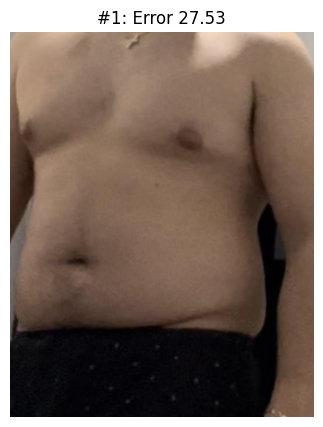

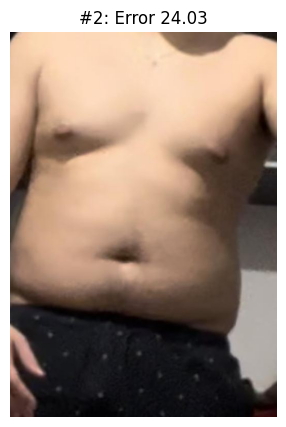

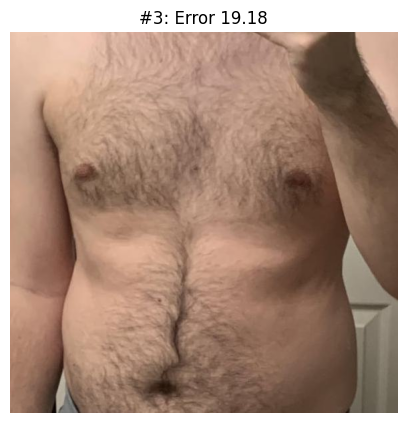

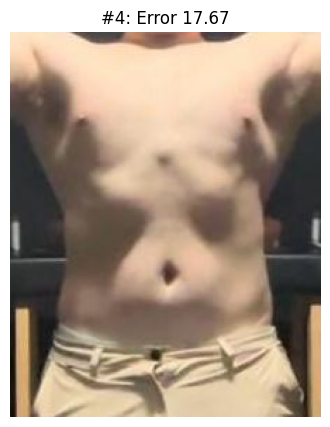

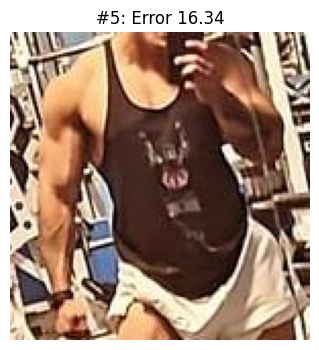

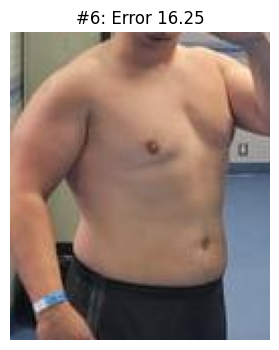

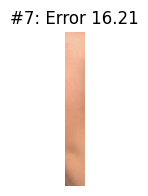

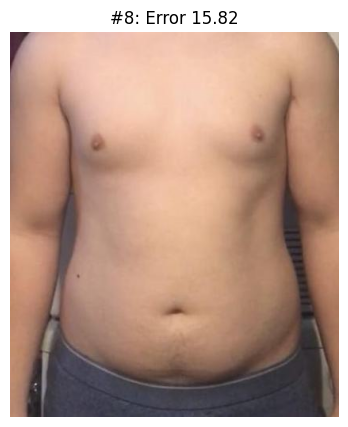

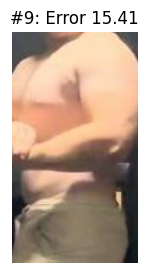

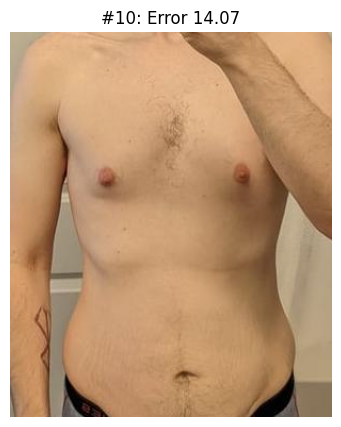

In [107]:
errors = []

pbar = tqdm(df.iterrows(), total=len(df), desc="Processing images", leave=True)

for i, row in pbar:
    try:
        img_path = f"{row['filename']}"  # change if your image path differs
        img = PILImage.create('images/' + img_path)
        bf, _, probs = learn.predict(img)
        pred = float(probs[0])
        actual = float(row['target'])
        error = abs(pred - actual)

        errors.append({
            "img_path": img_path,
            "img": img,
            "actual": actual,
            "pred": pred,
            "error": error
        })

        # Optionally update progress bar postfix
        pbar.set_postfix({"last_error": f"{error:.2f}"})

    except Exception as e:
        pbar.write(f"Skipping {row['filename']} due to error: {e}")

# Sort and show top 10 worst predictions
top_errors = sorted(errors, key=lambda x: x['error'], reverse=True)[:10]

for idx, item in enumerate(top_errors):
    print(f"\n#{idx+1}")
    print(f"File: {item['img_path']}")
    print(f"Predicted: {item['pred']:.2f}")
    print(f"Actual: {item['actual']:.2f}")
    print(f"Error: {item['error']:.2f}")
    show_image(item['img'], title=f"#{idx+1}: Error {item['error']:.2f}")


<Axes: >

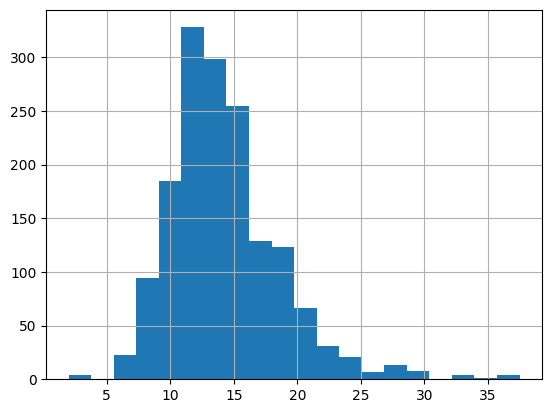

In [108]:
df['target'].hist(bins=20)